In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

In [ ]:
df=pd.read_csv("natural_disasters.csv")

In [ ]:
df.head(10)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
5,1903,6,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,23.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
6,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
7,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
8,1905,5,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,18.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
9,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,India,...,NaN,NaN,NaN,NaN,25000.0,3.479379,NaN,NaN,NaN,NaN


In [ ]:
# Data exploration
print(df.shape) # Check number of rows and columns
print(df.columns) # Check column names
print(df.head()) # Check first few rows of data
print(df.info()) # Check data types and non-null values
print(df.describe()) # Check summary statistics

(16126, 45)
Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')
   Year   Seq Glide Disaster Group Disaster Subgroup      Disaster Type  \
0  1900  9002   NaN        Natural    Climatological            Drought   
1  1900  9001   NaN        Natural    Climatological            Drough

EDA

In [ ]:
# Check number of rows and columns
print(df.shape) 

(16126, 45)


In this dataset we have 16126 rows and 45 columns

In [ ]:
df.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

From the above summary of a DataFrame's basic information, we could see that majority of the datatypes are of 'object' type.
There are 3 integers [Seq,Yeat, Start Year]
and 14 Float types columns,

In [ ]:
#summary statistics
print(df.describe())

               Year           Seq  Aid Contribution  Dis Mag Value  \
count  16126.000000  16126.000000      6.770000e+02   4.946000e+03   
mean    1996.764790    714.784820      1.254136e+05   4.735038e+04   
std       20.159065   1929.635089      2.997875e+06   3.094242e+05   
min     1900.000000      1.000000      1.000000e+00  -5.700000e+01   
25%     1989.000000     93.000000      1.750000e+02   7.000000e+00   
50%     2001.000000    270.000000      7.210000e+02   1.515000e+02   
75%     2011.000000    486.000000      3.511000e+03   1.129650e+04   
max     2021.000000   9881.000000      7.800000e+07   1.302587e+07   

        Start Year   Start Month     Start Day      End Year     End Month  \
count  16126.00000  15739.000000  12498.000000  16126.000000  15418.000000   
mean    1996.77837      6.444374     15.233957   1996.835607      6.576728   
std       20.15571      3.393965      8.953821     20.143010      3.352965   
min     1900.00000      1.000000      1.000000   1900.000

In [ ]:
#checking null values in each column
df.isnull().sum()

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  



*  Only 11 columns out of 45 has zero null values. 



Univariate Analysis and Bivariate Analysis

1. Year

It indicates the year in which the disaster reported/recorded.
The disaster might not have begun in the same year for some cases

In [ ]:
# Print basic statistical summary of the column
df['Year'].isna().sum()

0

In [ ]:
column_name = 'Year'
column_data = df['Year']
# Print basic statistical summary of the column
print(column_data.describe())

count    16126.000000
mean      1996.764790
std         20.159065
min       1900.000000
25%       1989.000000
50%       2001.000000
75%       2011.000000
max       2021.000000
Name: Year, dtype: float64


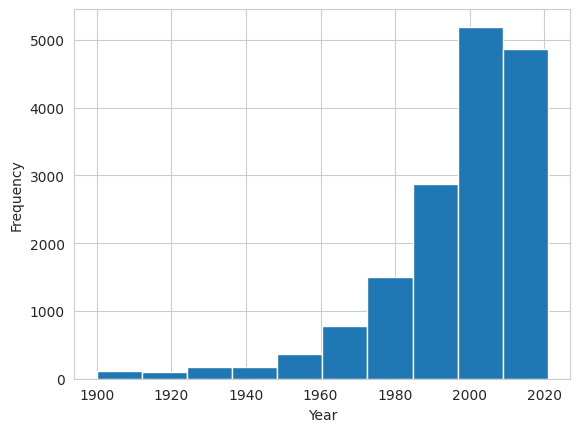

In [ ]:
# Generate a histogram of the column
plt.hist(column_data, bins=10)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

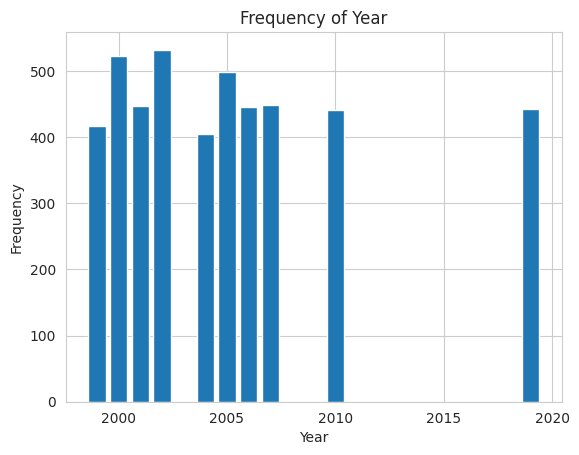

In [ ]:
year_freuency = df['Year'].value_counts()
year_freuency
top10=year_freuency.head(10)
plt.bar(top10.index,top10.values)
#plt.xticks(range(1, 21))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Year')
plt.show()

Findings of column Year:


*   There are no null values
*   Most disasters began in the year 2003 (500+)
*   2000 and 2005 follows second and third
*   Top 10 highest total occurance of disasters occured in the years between 1999 and 2018.







In [ ]:
correlation = df['Year'].corr(df['Start Year'])

# Count how many values in both columns are the same
same_values = sum(df['Year'] == df['Start Year'])

print(f"Correlation: {correlation}")
print(f"Number of same values: {same_values}")

Correlation: 0.9997236041095109
Number of same values: 15996


*   Start Year col and Year column values arent always same for all incident. So cant ignore either one.
*   Start year - when disater began. Year- when it was reported/recorded

2. Disaster Subgroup

Inidcates which disaster subgroup this natural disaster belongs to

In [ ]:
df['Disaster Subgroup'].isna().sum()

0

In [ ]:
df['Disaster Subgroup'].describe()

count            16126
unique               6
top       Hydrological
freq              6327
Name: Disaster Subgroup, dtype: object

In [ ]:
df['Disaster Subgroup'].unique()

array(['Climatological', 'Geophysical', 'Meteorological', 'Hydrological',
       'Biological', 'Extra-terrestrial'], dtype=object)

In [ ]:
dis_subgroup_freq = df['Disaster Subgroup'].value_counts()
dis_subgroup_freq

Hydrological         6327
Meteorological       5100
Geophysical          1857
Biological           1598
Climatological       1243
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64

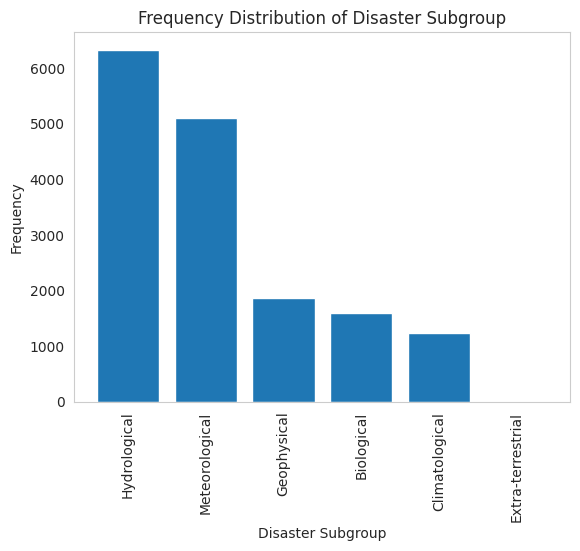

In [ ]:
#barchart of freq distribution
plt.bar(dis_subgroup_freq.index, dis_subgroup_freq.values)
plt.title("Frequency Distribution of Disaster Subgroup")
plt.xlabel("Disaster Subgroup")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.grid(False)
plt.show()



*   The natural disaster category is divided into 6 sub-groups: Biological, Geophysical, Climatological, Hydrological, Meteorological and Extra-terrestrial disasters.
* There are no null values. 
* Hydrological disasters are most occuring subgroup (6327 times) and least is extra terrestrial (one)

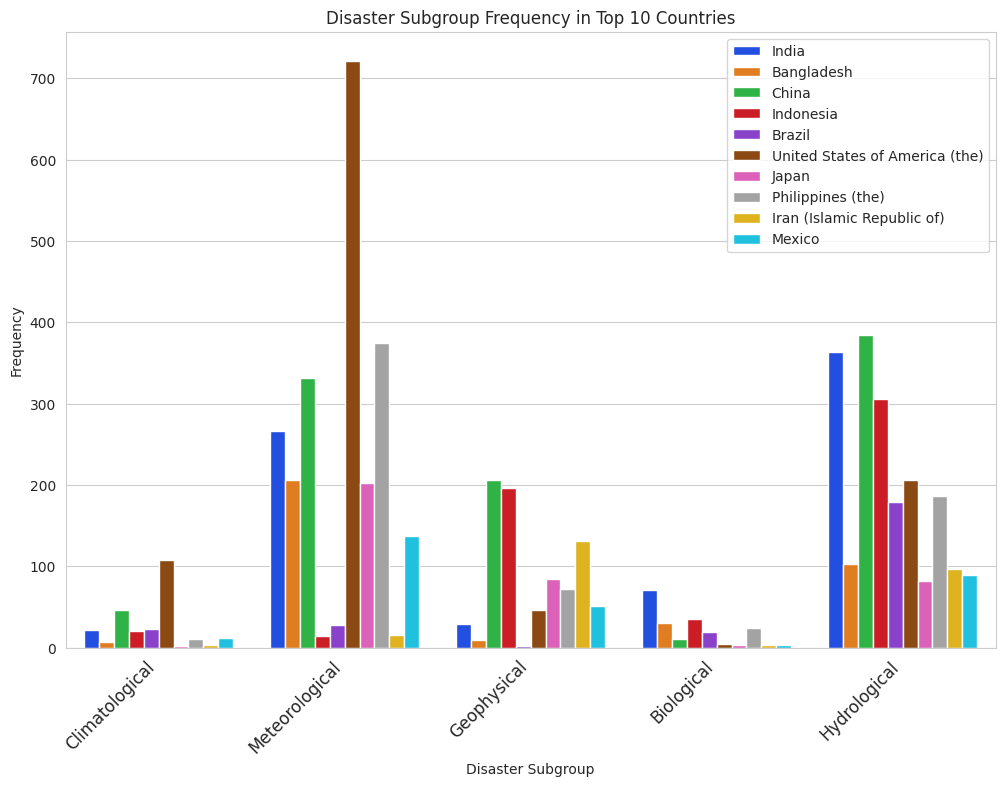

In [ ]:
#1.bivariate disaster subgroup - top 10 frequent countires
top_countries = df['Country'].value_counts().nlargest(10).index
top_subgroups = df['Disaster Subgroup'].value_counts().nlargest(10).index
filtered_data = df[df['Country'].isin(top_countries) & df['Disaster Subgroup'].isin(top_subgroups)]

plt.figure(figsize=(12,8))
sns.countplot(x='Disaster Subgroup', hue='Country', data=filtered_data, palette='bright')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Disaster Subgroup')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Disaster Subgroup Frequency in Top 10 Countries')
plt.show()

USA has high meteorological disasters, china and india has hydrological.

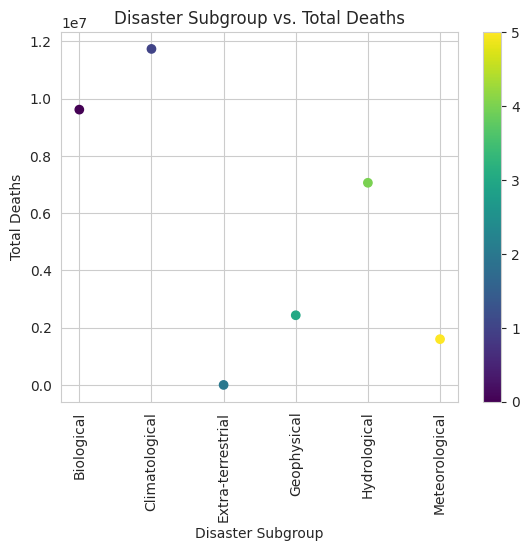

In [ ]:
#2.bivariate disaster subgroup - total deaths
# total deaths and total affected columns df
subgroup_deaths_affected = df[['Disaster Subgroup', 'Total Deaths', 'Total Affected']]

# Group the data by disaster subgroup and calculate the total deaths and total affected for each subgroup
subgroup_deaths_affected = subgroup_deaths_affected.groupby('Disaster Subgroup').sum()

# scatter plot
colors = np.arange(len(subgroup_deaths_affected))
plt.scatter(subgroup_deaths_affected.index, subgroup_deaths_affected['Total Deaths'], c=colors, cmap='viridis')
plt.xlabel('Disaster Subgroup')
plt.xticks(rotation = 90)
plt.ylabel('Total Deaths')
plt.title('Disaster Subgroup vs. Total Deaths')
plt.colorbar()
plt.show()

Climatological subgroup has caused highest death tolls till 2021 - (nearly 1Cr 20lakhs)

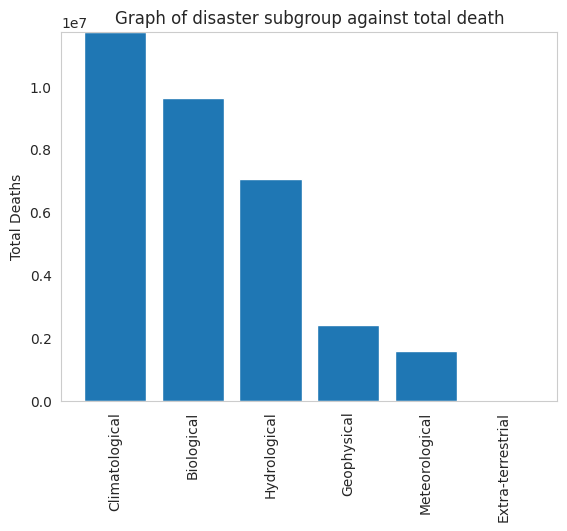

In [ ]:
columns = ['Disaster Subgroup', 'Total Deaths']
subset_df = df[columns]

# Group the data by subgroup, and calculate the sum of total deaths
grouped_df = subset_df.groupby('Disaster Subgroup').agg({'Total Deaths': 'sum'}).reset_index()

#data in descending order of total deaths
sorted_df = grouped_df.sort_values(by='Total Deaths', ascending=False)
plt.bar(sorted_df['Disaster Subgroup'][:15], sorted_df['Total Deaths'][:15])
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Graph of disaster subgroup against total death')
plt.ylabel('Total Deaths')
plt.ylim(0, sorted_df['Total Deaths'].max())
plt.show()

This graph shows that climatological disasters has highest death tolls from 1900 to 2021. More than one crore. And least is extra-terrestrial

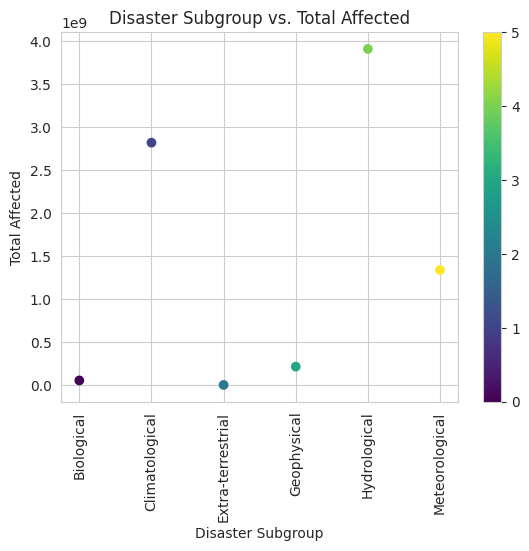

In [ ]:
#3.bivariate - disaster subgroup - total affected
# Create a scatter plot for disaster subgroup and total affected
plt.scatter(subgroup_deaths_affected.index, subgroup_deaths_affected['Total Affected'], c=colors, cmap='viridis')
plt.xlabel('Disaster Subgroup')
plt.ylabel('Total Affected')
plt.xticks(rotation=90)
plt.title('Disaster Subgroup vs. Total Affected')
plt.colorbar()
plt.show()

Highest Total Affected people (sum of injured/affected/and homeless) was due to Hydrological disaster subgroups (nearly 3.9*10^9)

3. Disaster Type

This column records which disaster is occurred . This column is related to disaster subgroup and disaster group

In [ ]:
Disaster_Type_missing_values = df['Disaster Type'].isnull().sum()
Disaster_Type_missing_values

0

In [ ]:
df['Disaster Type'].describe()

count     16126
unique       15
top       Flood
freq       5551
Name: Disaster Type, dtype: object

In [ ]:
mode_dis_type = df['Disaster Type'].mode()
print('Mode Disaster Type:', mode_dis_type)

Mode Disaster Type: 0    Flood
Name: Disaster Type, dtype: object


The mode of the 'Disaster Type' column is 'Flood'. Which indicated that flood is the disaster that occured frequently globally according to the dataset (5551 times)

In [ ]:
df['Disaster Type'].unique()

array(['Drought', 'Earthquake', 'Volcanic activity',
       'Mass movement (dry)', 'Storm', 'Flood', 'Epidemic', 'Landslide',
       'Wildfire', 'Extreme temperature ', 'Fog', 'Insect infestation',
       'Impact', 'Animal accident', 'Glacial lake outburst'], dtype=object)

The dataset includes records of 15 types of disasters.


In [ ]:
Disaster_Type_frequency=df['Disaster Type'].value_counts()

In [ ]:
Disaster_Type_frequency

Flood                    5551
Storm                    4496
Earthquake               1544
Epidemic                 1501
Landslide                 776
Drought                   770
Extreme temperature       603
Wildfire                  471
Volcanic activity         265
Insect infestation         96
Mass movement (dry)        48
Glacial lake outburst       2
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64

**The 'Disaster Type' column has a high frequency of 'Flood' and 'Storm' disasters, which together account for over 60% of all disasters in the dataset. 'Flood' being the most frequent type, its followed by 'Storm', 'Earthquake', and 'Epidemic'.**
**

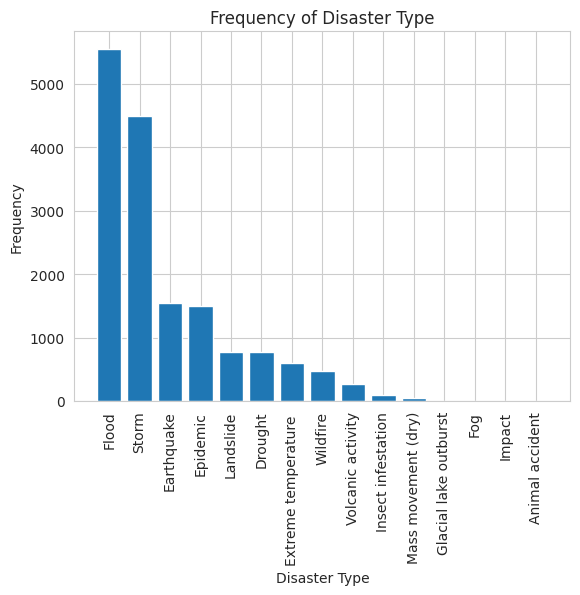

In [ ]:
plt.bar(Disaster_Type_frequency.index,Disaster_Type_frequency.values)
plt.xticks(rotation=90)
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.title('Frequency of Disaster Type')
plt.show()

**The bar plot of the 'Disaster Type' column shows the frequency distribution of each disaster type, with 'Flood' having the highest frequency and 'Animal accident', 'Impact', 'Glacial lake outburst' and 'Fog' having the lowest frequency.**

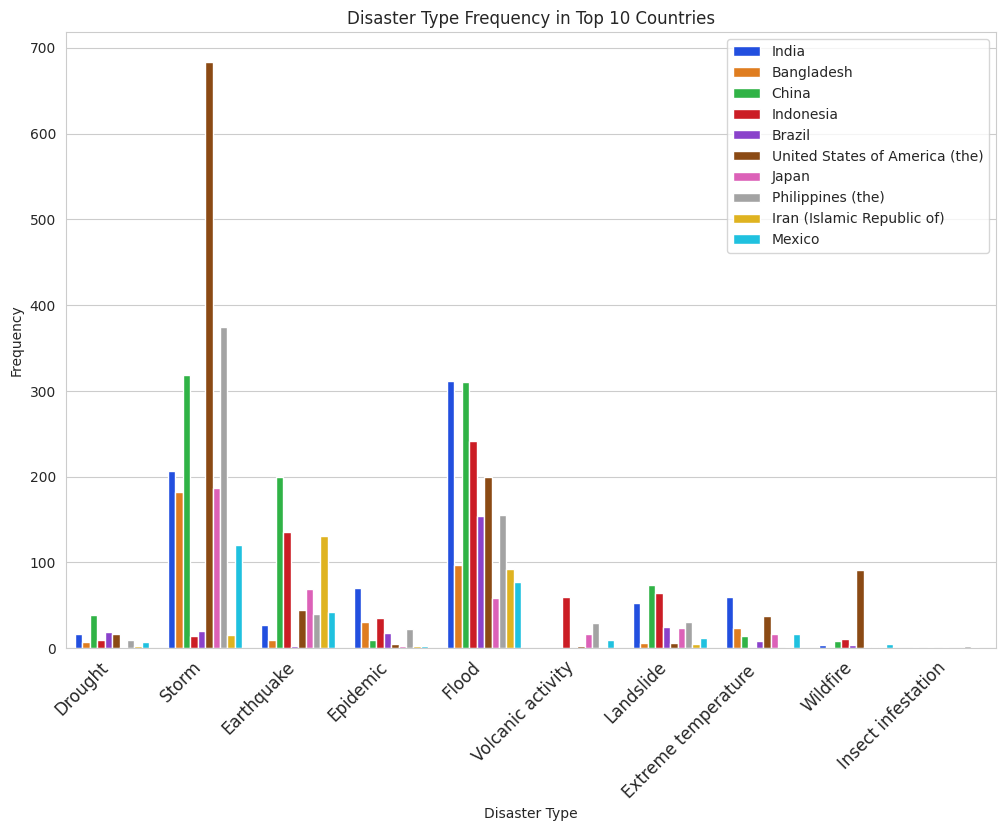

In [ ]:
#4. bivariate - Disaster Type and Top 10 high frequency countires relation
top_countries = df['Country'].value_counts().nlargest(10).index
top_subgroups = df['Disaster Type'].value_counts().nlargest(10).index
filtered_data = df[df['Country'].isin(top_countries) & df['Disaster Type'].isin(top_subgroups)]

plt.figure(figsize=(12,8))
sns.countplot(x='Disaster Type', hue='Country', data=filtered_data, palette='bright')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Disaster Type Frequency in Top 10 Countries')
plt.show()

Findings:
Storm and Flood are dominant disaster types in all countries.
USA, Philippines ,china are in ascendig order of countries that was affected by storm
In case of flood India and china are similarly affected by it, followed by Indonesia
India is least affected by Insect infection

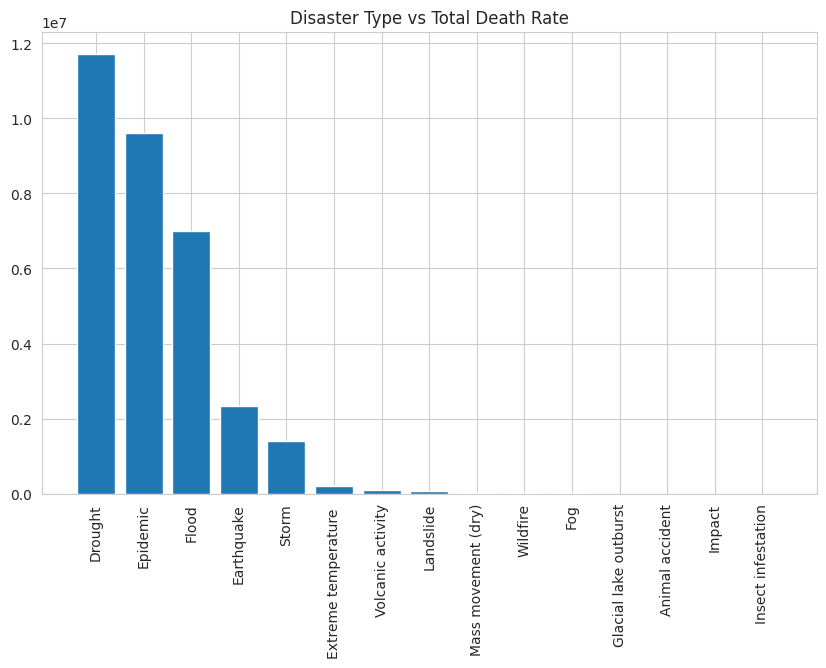

In [ ]:
#5.bivariate - Disaster Type and Total Death Rate Relationship

cols = ['Disaster Type', 'Total Deaths']
subset_df = df[cols]

# Group the data by subgroup, and calculate the sum of total deaths
grouped_df = subset_df.groupby('Disaster Type').agg({'Total Deaths': 'sum'}).reset_index()

#data in descending order of total deaths
sorted_df = grouped_df.sort_values(by='Total Deaths', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Disaster Type vs Total Death Rate')
plt.bar(sorted_df['Disaster Type'], sorted_df['Total Deaths'])
plt.xticks(rotation=90)
plt.show()

Findings:
Drought has highest death tolls - nearly 1.2 Cr
Epidemic and floods are second and third in ranking - which in turn proves subgroup climatological has highest death rate. 

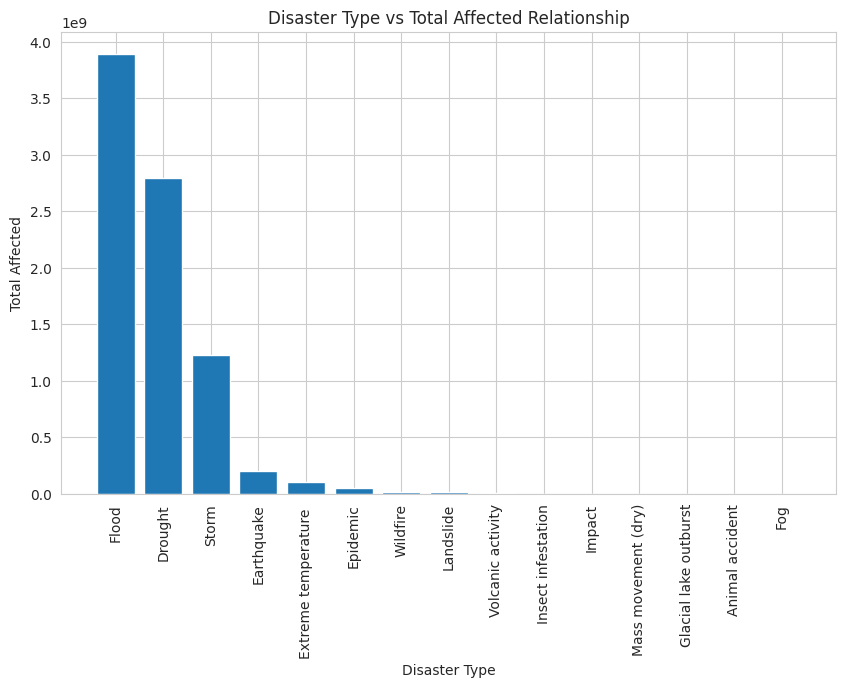

In [ ]:
#6.bivariate - disaster type - total affected
cols = ['Disaster Type', 'Total Affected']
subset_df = df[cols]

# Group the data by subgroup, and calculate the sum of total affected
grouped_df = subset_df.groupby('Disaster Type').agg({'Total Affected': 'sum'}).reset_index()

#data in descending order of total deaths
sorted_df = grouped_df.sort_values(by='Total Affected', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Disaster Type vs Total Affected Relationship')
plt.xlabel('Disaster Type')
plt.ylabel('Total Affected')
plt.bar(sorted_df['Disaster Type'], sorted_df['Total Affected'])
plt.xticks(rotation=90)
plt.show()

Flood is the disaster type that had highly affected globally with a rate of nealry 4*10^9 
Drought and storm are the second and third disasters which cause injury/homlessness/affcetd in any other ways

4. Disaster Subtype

This column represents the subdivision related to disaster type. It includes more specific classification of disaster 
eg: Floods - reverine flood,coastal flood etc

In [ ]:
df['Disaster Subtype'].dtype

dtype('O')

In [ ]:
#check for missing val
df['Disaster Subtype'].isna().sum()

3110

In [ ]:
#Describe the var
df['Disaster Subtype'].describe()

count              13016
unique                27
top       Riverine flood
freq                2660
Name: Disaster Subtype, dtype: object

In [ ]:
#data exploration
df['Disaster Subtype'].nunique()

27

There are 27 disaster subtypes in this dataset.

Reverine flood is the high frequent dis-subtype (2660). Subsidence and Pyroclastic flow are the lowest frequency ones (2)

This column has around 3k null values

In [ ]:
dis_subtype_freq = df['Disaster Subtype'].value_counts()
dis_subtype_freq

Riverine flood                      2660
Tropical cyclone                    2420
Ground movement                     1484
Convective storm                    1118
Flash flood                          779
Drought                              769
Bacterial disease                    768
Landslide                            570
Viral disease                        543
Forest fire                          313
Cold wave                            307
Ash fall                             246
Heat wave                            219
Extra-tropical storm                 131
Land fire (Brush, Bush, Pasture)     123
Avalanche                            119
Coastal flood                         85
Severe winter conditions              77
Mudslide                              76
Locust                                62
Tsunami                               57
Parasitic disease                     49
Grasshopper                           16
Rockfall                              12
Lava flow       

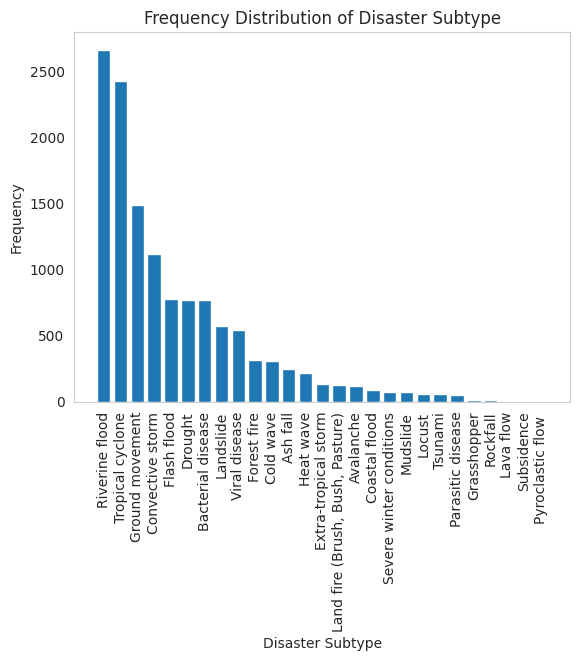

In [ ]:
#barchart of freq distribution
plt.bar(dis_subtype_freq.index, dis_subtype_freq.values)
plt.title("Frequency Distribution of Disaster Subtype")
plt.xlabel("Disaster Subtype")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

Riverine flood which is a kind of disaster type flood and group (hydraulogical) has the highest frequency rate (2660)

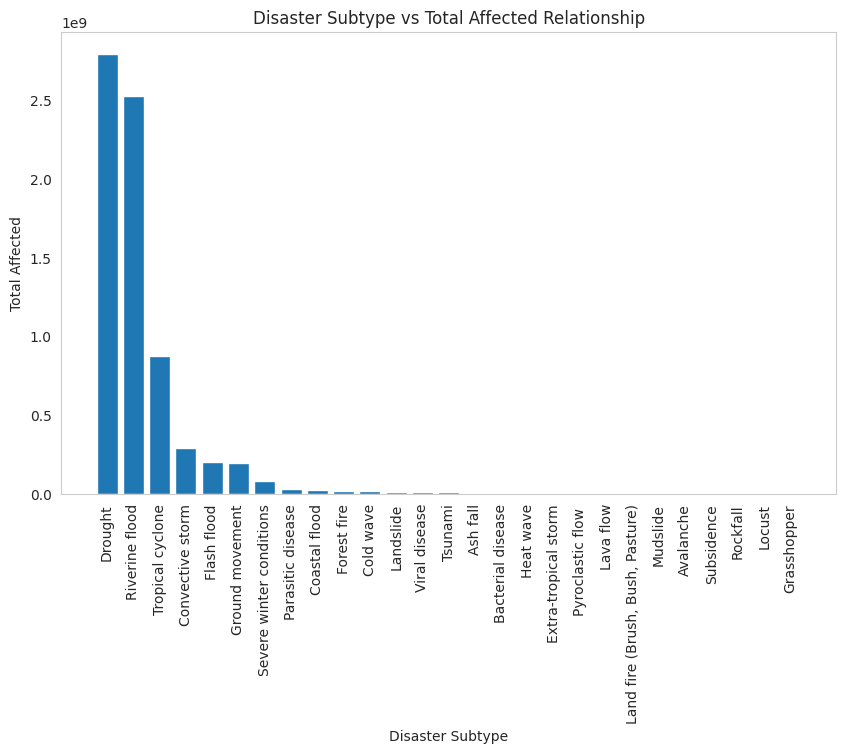

In [ ]:
#7.bivariate - disaster Subtype - total affected
cols = ['Disaster Subtype', 'Total Affected']
subset_df = df[cols]

# Group the data by subgroup, and calculate the sum of total affected
grouped_df = subset_df.groupby('Disaster Subtype').agg({'Total Affected': 'sum'}).reset_index()

#data in descending order of total deaths
sorted_df = grouped_df.sort_values(by='Total Affected', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Disaster Subtype vs Total Affected Relationship')
plt.xlabel('Disaster Subtype')
plt.ylabel('Total Affected')
plt.bar(sorted_df['Disaster Subtype'], sorted_df['Total Affected'])
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

Eventhough reverine flood is highest frequent subtype , the one that affceted most globally is drought.
Reverine flood only comes second in causing injury or any other cases.

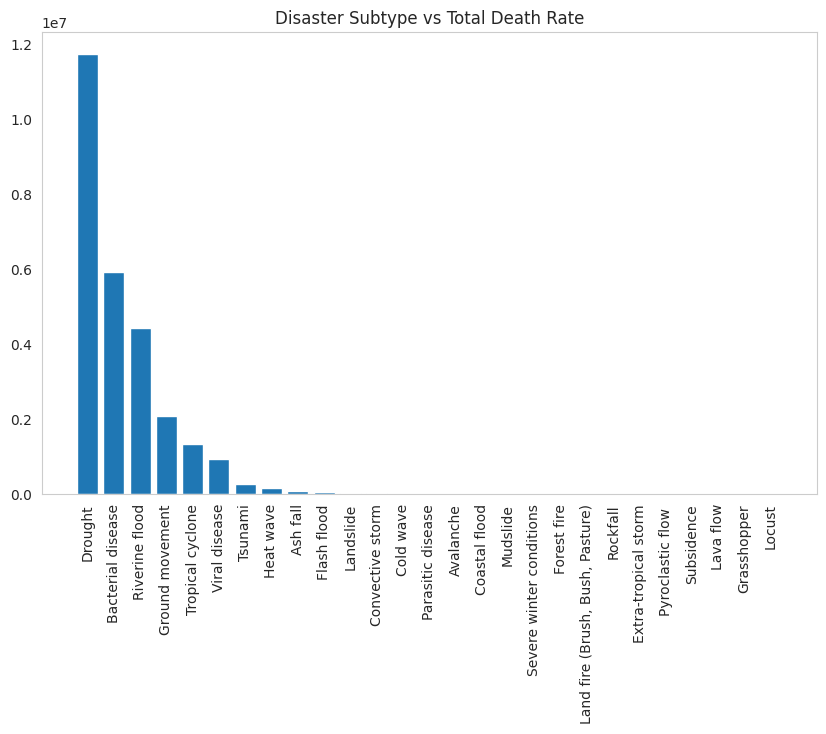

In [ ]:
#8.bivariate - Disaster SubType and Total Death Rate Relationship

cols = ['Disaster Subtype', 'Total Deaths']
subset_df = df[cols]

# Group the data by subgroup, and calculate the sum of total deaths
grouped_df = subset_df.groupby('Disaster Subtype').agg({'Total Deaths': 'sum'}).reset_index()

#data in descending order of total deaths
sorted_df = grouped_df.sort_values(by='Total Deaths', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Disaster Subtype vs Total Death Rate')
plt.bar(sorted_df['Disaster Subtype'], sorted_df['Total Deaths'])
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

Drought has caused highest death rate (1.2C) and bacterial disease has caused second highest death rate (60lakhs)

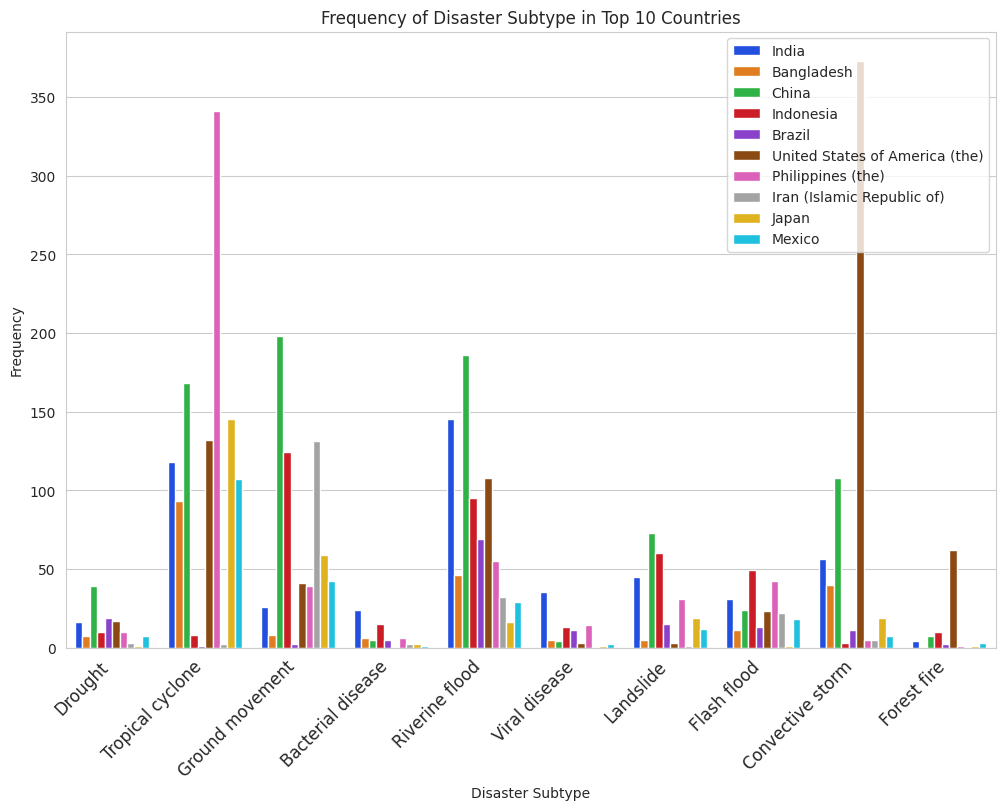

In [ ]:
#9.bivariate disaster subtype - top 10 frequent countires
top_countries = df['Country'].value_counts().nlargest(10).index
top_subgroups = df['Disaster Subtype'].value_counts().nlargest(10).index
filtered_data = df[df['Country'].isin(top_countries) & df['Disaster Subtype'].isin(top_subgroups)]

plt.figure(figsize=(12,8))
sns.countplot(x='Disaster Subtype', hue='Country', data=filtered_data, palette='bright')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Disaster Subtype')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Frequency of Disaster Subtype in Top 10 Countries')
plt.show()

USA has been highly affected by convective storm, India by reverine flood and china by ground movement according to the dataset.
Tropical cyclone in phylippines is the one with high frequency when we look into assocaition between disaster subtype and top 10 affected countries.

5. Country

The country where the disaster has occured or had an impact on

In [ ]:
Country_missing_values = df['Country'].isnull().sum()
Country_missing_values

0

**The column contains information on the country in which a natural disaster occurred, and this information is present for all rows in the dataset (no missing values).**

In [ ]:
df['Country'].describe()

count                              16126
unique                               228
top       United States of America (the)
freq                                1087
Name: Country, dtype: object

**The column contains data for 228 unique countries and territories, with the United States of America being the country with the highest frequency of natural disasters (1087).**

In [ ]:
mode_Country = df['Country'].mode()
print('Mode of Country:', mode_Country)

Mode of Country: 0    United States of America (the)
Name: Country, dtype: object


In [ ]:
Country_frequency=df['Country'].value_counts()
Country_frequency

United States of America (the)    1087
China                              980
India                              752
Philippines (the)                  668
Indonesia                          572
                                  ... 
Qatar                                1
Saint Barthélemy                     1
Saint Martin (French Part)           1
Sint Maarten (Dutch part)            1
Isle of Man                          1
Name: Country, Length: 228, dtype: int64

In [ ]:
Country_frequency_top10=df['Country'].value_counts().head(10)
Country_frequency_top10

United States of America (the)    1087
China                              980
India                              752
Philippines (the)                  668
Indonesia                          572
Japan                              375
Bangladesh                         356
Mexico                             293
Iran (Islamic Republic of)         252
Brazil                             251
Name: Country, dtype: int64

**The top 10 countries with the highest frequency of natural disasters include the United States, China, India, the Philippines, Indonesia, Japan, Bangladesh, Mexico, Iran, and Brazil.**

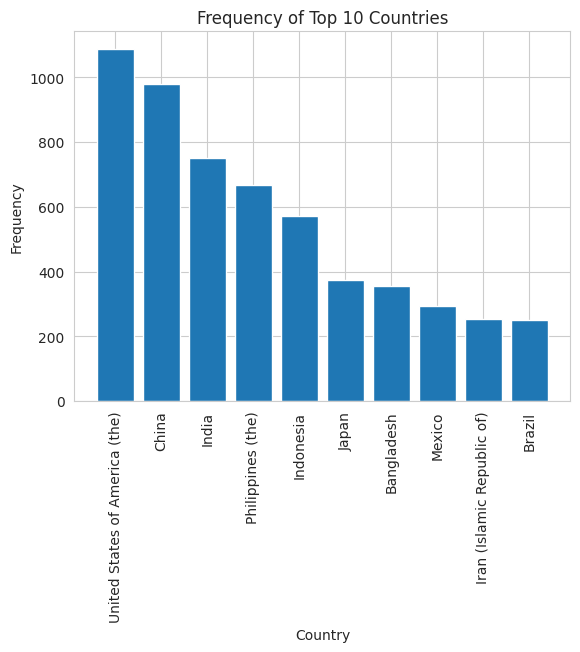

In [ ]:
plt.bar(Country_frequency_top10.index,Country_frequency_top10.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Countries')
plt.show()

**The graph shows the frequency of natural disasters for the top 10 countries with the highest frequency of natural disasters. The graph shows that the United States has the highest frequency of natural disasters, followed by China, India, the Philippines, Indonesia, Japan, Bangladesh, Mexico, Iran, and Brazil.**



**The normalized frequency of natural disasters for each country shows the proportion of natural disasters for each country out of the total number of natural disasters in the dataset. It indicates that the United States has the highest proportion of natural disasters, followed by China, India, the Philippines, and Indonesia.**

6. ISO

This code is a three-letter country code that is used to uniquely identify each country or territory in the world.


In [ ]:
#remove whitespace
df['ISO'] = df['ISO'].str.strip()

In [ ]:
#NULL values present or not
df['ISO'].isna().sum()

0

In [ ]:
#Describe the var
df['ISO'].describe()

count     16126
unique      228
top         USA
freq       1087
Name: ISO, dtype: object

In [ ]:
#data exploration
df['ISO'].nunique()

228

228 unique ISO calues are present, USA is higher in count - 1087, which indicates to higher disaster occurance in that country in turn.

In [ ]:
iso_freq = df['ISO'].value_counts()
iso_freq

USA    1087
CHN     980
IND     752
PHL     668
IDN     572
       ... 
QAT       1
BLM       1
MAF       1
SXM       1
IMN       1
Name: ISO, Length: 228, dtype: int64

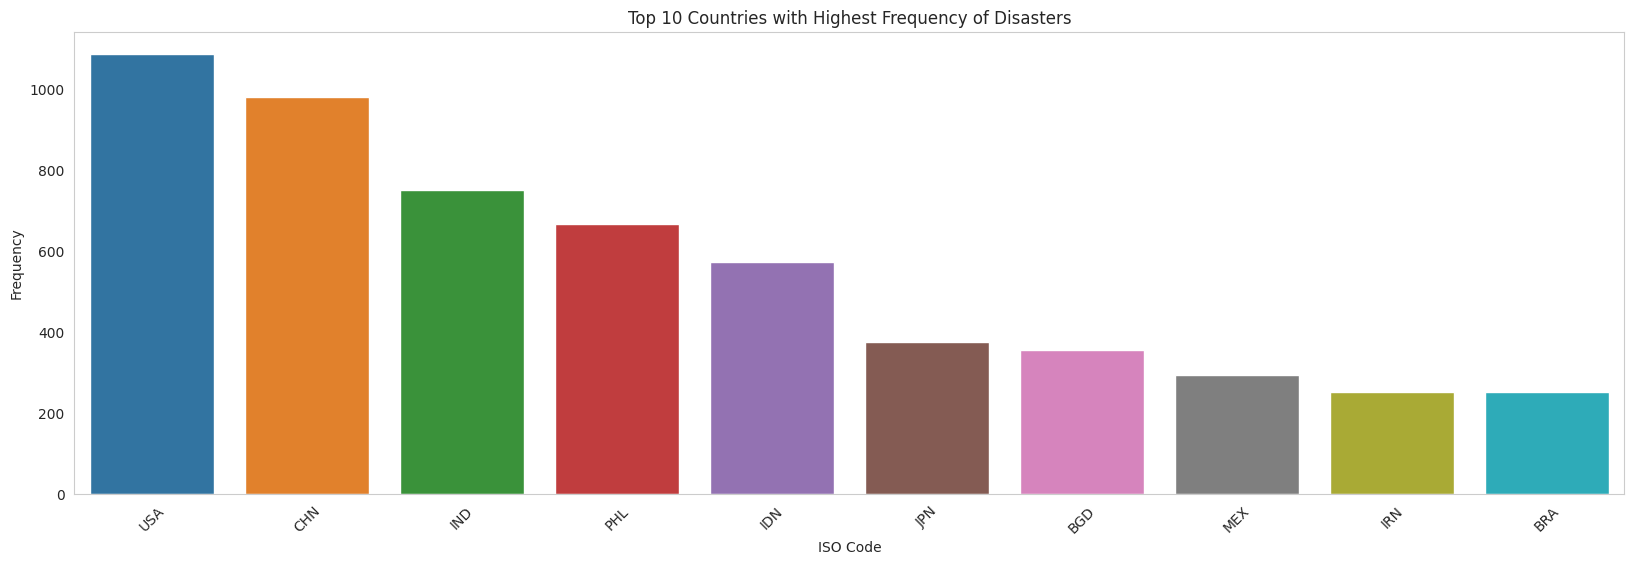

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='ISO', data=df, order = iso_freq.index[:10])
plt.title('Top 10 Countries with Highest Frequency of Disasters')
plt.xlabel('ISO Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

This graph also is similar to that of frequency graph of top 10 countries, since iso is just a code for each country

7. Region 

The region to which the country belongs. This field is automatically linked to the country. 

In [ ]:
df['Region'].isna().sum()

0

In [ ]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'Northern America', 'Eastern Africa', 'South America',
       'Western Europe', 'Eastern Asia', 'Caribbean',
       'South-Eastern Asia', 'Northern Africa', 'Eastern Europe',
       'Southern Europe', 'Melanesia', 'Australia and New Zealand',
       'Polynesia', 'Northern Europe', 'Western Asia', 'Micronesia',
       'Southern Africa', 'Middle Africa', 'Russian Federation',
       'Central Asia'], dtype=object)

In [ ]:
df['Region']=df['Region'].str.strip()

In [ ]:
df['Region'].describe()

count             16126
unique               23
top       Southern Asia
freq               2068
Name: Region, dtype: object

In [ ]:
Region_frequency=df['Region'].value_counts()
Region_frequency

Southern Asia                2068
South-Eastern Asia           1939
Eastern Asia                 1840
South America                1283
Northern America             1237
Eastern Africa               1159
Central America               823
Western Africa                806
Southern Europe               650
Caribbean                     628
Eastern Europe                547
Western Europe                528
Western Asia                  499
Middle Africa                 428
Northern Africa               345
Australia and New Zealand     326
Melanesia                     258
Northern Europe               212
Southern Africa               208
Central Asia                  144
Polynesia                      94
Russian Federation             60
Micronesia                     44
Name: Region, dtype: int64

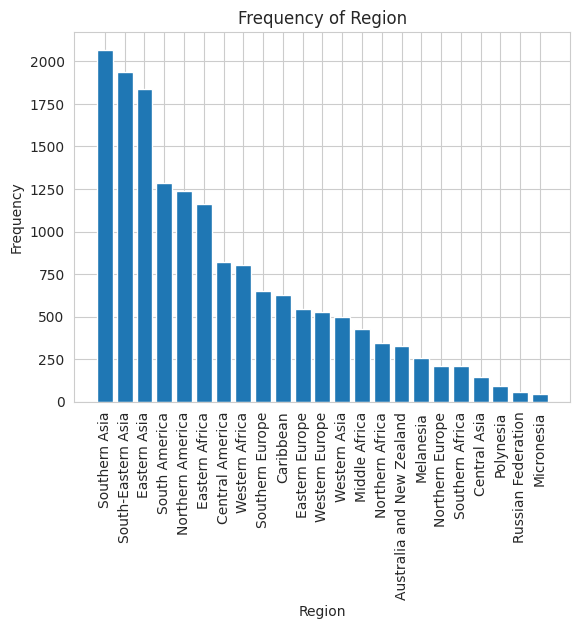

In [ ]:
plt.bar(Region_frequency.index,Region_frequency.values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Region')
plt.show()

In [ ]:
Region_frequency_top10=df['Region'].value_counts().head(10)
Region_frequency_top10

Southern Asia         2068
South-Eastern Asia    1939
Eastern Asia          1840
South America         1283
Northern America      1237
Eastern Africa        1159
Central America        823
Western Africa         806
Southern Europe        650
Caribbean              628
Name: Region, dtype: int64

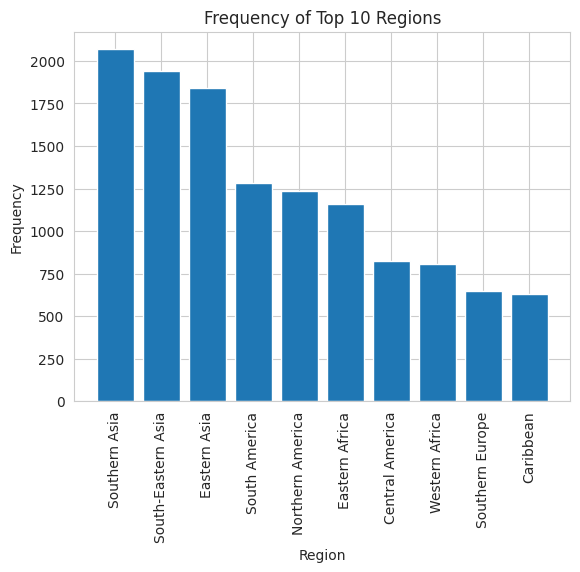

In [ ]:
plt.bar(Region_frequency_top10.index,Region_frequency_top10.values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Regions')
plt.show()

No null values in the column

23 unique values for region

From this we can understand that  natural disaster occured more in southern asia (2068) and least in Russian Federation and Micronesia (44)
       

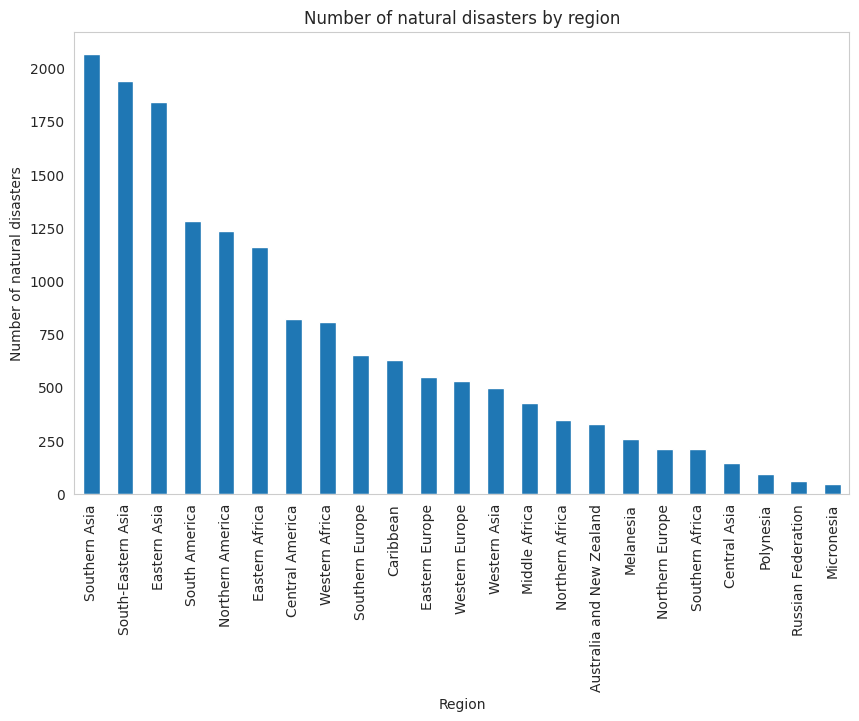

In [ ]:
#10.bivariate - Region and the number of natural disasters in that region
df['Region'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Number of natural disasters')
plt.title('Number of natural disasters by region')
plt.grid(False)

Sothern Asia has highest number of disasters among all the 23 regions followed by south-eastern asia and eastern asia

Micronesia has the lowest

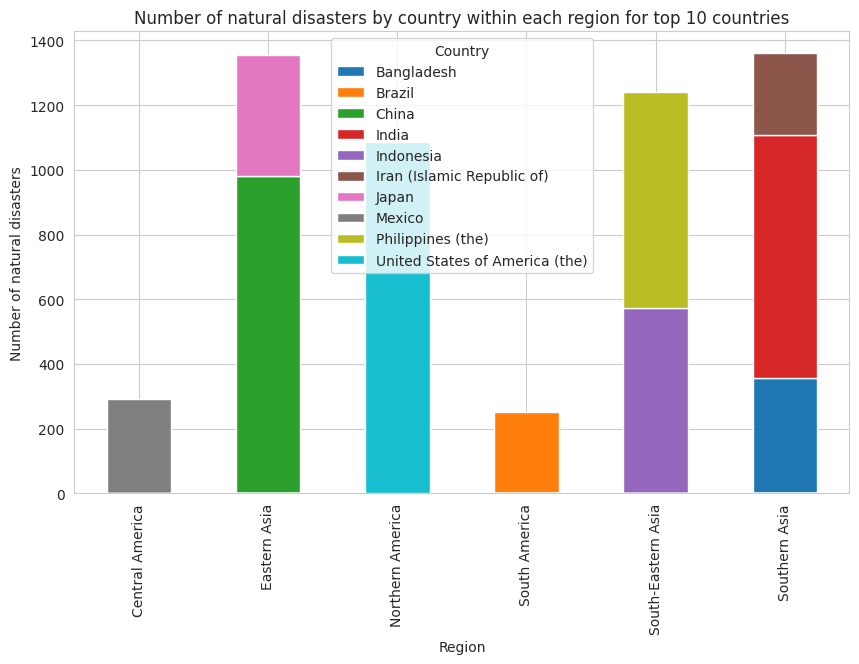

In [ ]:
# 1. multivariate 
#the number of natural disasters by country within each region
top_countries = df['Country'].value_counts().head(10).index
df[df['Country'].isin(top_countries)].groupby('Region')['Country'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Number of natural disasters')
plt.title('Number of natural disasters by country within each region for top 10 countries')
plt.legend(title='Country')



*   This graph shows that eastern asia and southern asia has highest number of disasters. while south america has the least
*   In EA - China has highest natural disasters followed by Japan
*   In SA - India has highest disasters, bangaldesh second and iran third
*   USA has highest number in natural disaster which also makes them highest in north america

Brazil is the only south american country in top 10 and same goes for mexico in central america



8. Decleration

Shows whether a state of emergency was declared in country(ies) or not.

In [ ]:
df['Declaration'].isna().sum()

12870

In [ ]:
Declaration_frequency=df['Declaration'].value_counts()
Declaration_frequency

No     2342
Yes     914
Name: Declaration, dtype: int64

There are 12k null values

2342 times No state of emergency was declared and 914 times it was

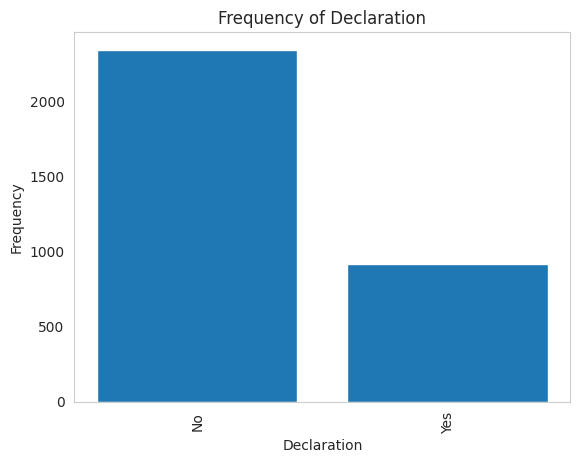

In [ ]:
plt.bar(Declaration_frequency.index,Declaration_frequency.values)
plt.xticks(rotation=90)
plt.xlabel('Declaration')
plt.ylabel('Frequency')
plt.title('Frequency of Declaration')
plt.grid(False)
plt.show()

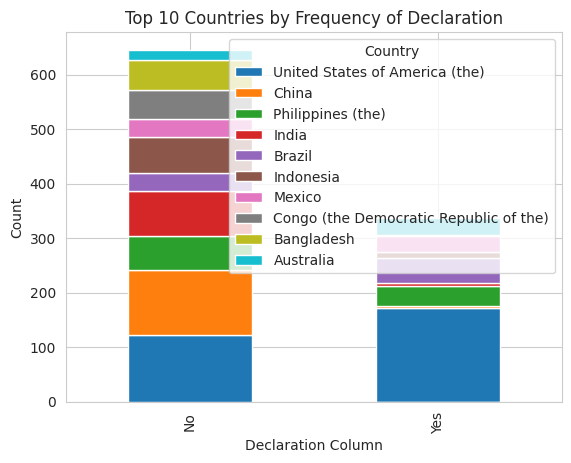

In [ ]:
#11.Bivariate - Decleratin of state of emergency and country corresponding

dfsub = df[df['Declaration'].notnull()]
dfsub = dfsub[['Declaration', 'Country']]

# Count the occurrences of each value in the columns
counts = dfsub.groupby(['Declaration', 'Country']).size()
counts = counts.unstack()
top10_countries = counts.sum(axis=0).nlargest(10).index
counts = counts[top10_countries]


counts.plot(kind='bar', stacked=True)
plt.xlabel('Declaration Column')
plt.ylabel('Count')
plt.title('Top 10 Countries by Frequency of Declaration')
plt.show()

We can see that America is the country that has declared state oof emergency out of the declared countries (top 10 countries )

And china is the country that has highest rate for not declaring emergency and even when they declared the emergency, they have the lowest freuency than any other top10 countries. 

Congo and Bangladesh are the countries that has never declared state of emergency in the top 10 countries


9. Disaster Magnitude Value

The intensity  of a specific disaster. 
Includes numerical value which shows extend of damage caused by a disaster.

In this dataset it represent the number of people affected by the disaster event. 

In [ ]:
Dis_Mag_Value_missing_values = df['Dis Mag Value'].isnull().sum()
Dis_Mag_Value_missing_values

11180

In [ ]:
# Calculate the percentage of missing values
percentage_missing_values = (Dis_Mag_Value_missing_values / len(df)) * 100
percentage_missing_values

69.32903385836538

**Around 69% of the values in the "Dis Mag Value" column are missing.**

In [ ]:
df['Dis Mag Value'].describe()

count    4.946000e+03
mean     4.735038e+04
std      3.094242e+05
min     -5.700000e+01
25%      7.000000e+00
50%      1.515000e+02
75%      1.129650e+04
max      1.302587e+07
Name: Dis Mag Value, dtype: float64

In [ ]:
mean_dis_mag_value = df['Dis Mag Value'].mean()
median_dis_mag_value = df['Dis Mag Value'].median()
mode_dis_mag_value = df['Dis Mag Value'].mode()[0]  

# Print the results
print('Mean Dis Mag Value:', mean_dis_mag_value)
print('Median Dis Mag Value:', median_dis_mag_value)
print('Mode Dis Mag Value:', mode_dis_mag_value)

Mean Dis Mag Value: 47350.38030731904
Median Dis Mag Value: 151.5
Mode Dis Mag Value: 6.0


**The mean value of the "Dis Mag Value" column is 47,350, while the median is 151.5. The mode is 6.0, which is the most common value.**

In [ ]:
df['Dis Mag Value'].fillna('Unknown',inplace=True)
df['Dis Mag Value'].isna().sum()

0

**The missing values in the "Dis Mag Value" column have been replaced with "Unknown" and subsequently with NaN.**

In [ ]:
Dis_Mag_Value_frequency=df['Dis Mag Value'].value_counts().head(10)
Dis_Mag_Value_frequency

Unknown    11180
6.0          534
7.0          464
5.0          251
8.0          175
100.0         81
130.0         63
120.0         62
150.0         61
160.0         55
Name: Dis Mag Value, dtype: int64

**The frequency distribution of the "Dis Mag Value" column is heavily skewed to the right, with the majority of values falling below 1000.
The top five most frequent values are: Unknown (69.3%), 6.0 (3.3%), 7.0 (2.9%), 5.0 (1.6%), and 8.0 (1.1%).**

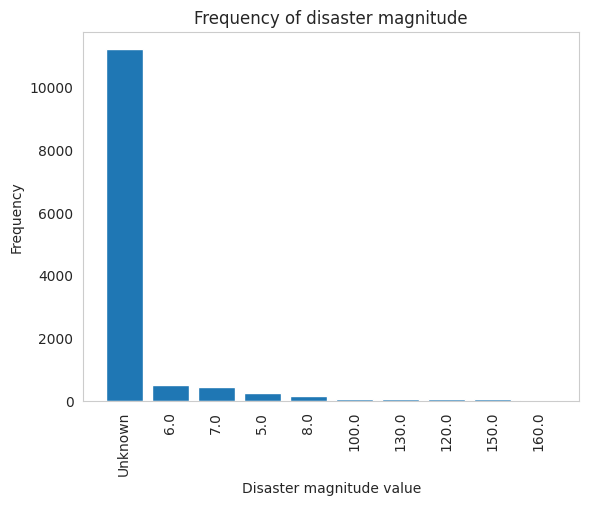

In [ ]:
#visualisation

df['Dis Mag Value'] = df['Dis Mag Value'].astype(str)
Dis_Mag_Value_frequency=df['Dis Mag Value'].value_counts().head(10)
plt.bar(Dis_Mag_Value_frequency.index ,Dis_Mag_Value_frequency.values)
plt.xticks(rotation=90)
plt.xlabel('Disaster magnitude value')
plt.ylabel('Frequency')
plt.title('Frequency of disaster magnitude')
plt.grid(False)
plt.show()


In [ ]:
df['Dis Mag Value'] = pd.to_numeric(df['Dis Mag Value'], errors='coerce')
dis=df['Dis Mag Value'].nlargest(10)
dis

13180    13025874.0
14062     8000000.0
7175      7600000.0
4152      7500000.0
8198      2857000.0
12150     2643786.0
7735      2610994.0
3235      2600000.0
10126     2500000.0
13285     2440002.0
Name: Dis Mag Value, dtype: float64

Highest number of affected value is 13025874. Top 10 disaster mag values are above 24 lakhs which shows high impacts of natural disasters on those countries

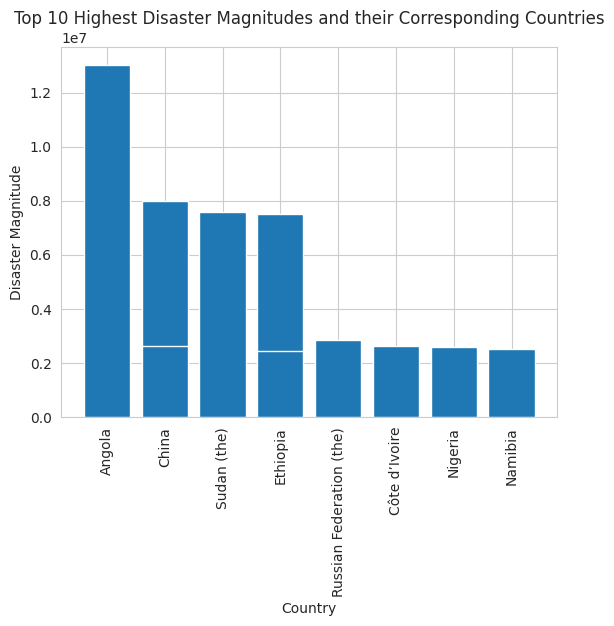

In [ ]:
#12.Bivariate - Disastery magnitude and their country

top_disasters = df.nlargest(10, 'Dis Mag Value')[['Dis Mag Value', 'Country']]

# Create a bar plot of the top 10 disaster magnitudes and their corresponding country values
plt.bar(top_disasters['Country'], top_disasters['Dis Mag Value'])
plt.xlabel('Country')
plt.ylabel('Disaster Magnitude')
plt.title('Top 10 Highest Disaster Magnitudes and their Corresponding Countries')
plt.xticks(rotation=90)
plt.show()

Angola is the country with highest disaster mag value followed by china, sudan and ethiopia

10. Start Year

The year when the disaster occurred. This  is well defined for all sudden-impact disasters. For disaster situations developing gradually over a longer time period (i.e. drought) with no onset date, the field  can be left blank.

In [ ]:
df['Start Year'].isna().sum()

0

In this , there are no missing values.

In [ ]:
df['Start Year'].dtype

dtype('int64')

In [ ]:
df['Start Year']=pd.to_numeric(df['Start Year'],errors='coerce')

In [ ]:
df['Start Year'].unique()

array([1900, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1972, 1971, 1970, 1973, 1974, 1975, 1976, 1977, 1978,
       1901, 1913, 1979, 1983, 1980, 1982, 1981, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1992, 1991, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [ ]:
df['Start Year'].describe()

count    16126.00000
mean      1996.77837
std         20.15571
min       1900.00000
25%       1989.00000
50%       2001.00000
75%       2011.00000
max       2021.00000
Name: Start Year, dtype: float64

The "Start year" column has a minimum value of 1900, a maximum value of 2021, and a mean of 1996.77. The median value (50th percentile) is 2001.

The mode (most frequent value) of the "Start year" column is 2000, which means that the most common year for disasters to begin is on that year.




In [ ]:
Start_Year_frequency=df['Start Year'].value_counts()
Start_Year_frequency_top10=df['Start Year'].value_counts().head(10)
Start_Year_frequency_top10

2000    525
2002    505
2005    488
2006    462
2007    450
2001    447
2019    438
2010    435
2003    420
1999    414
Name: Start Year, dtype: int64

In year of 2000, there is a high frequency while in 1901 it has only low disaster frequency

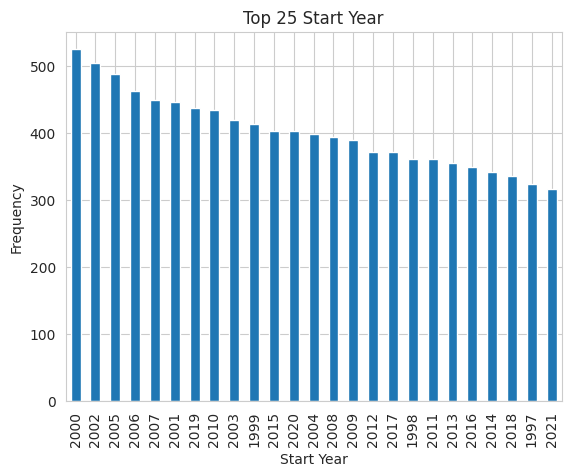

In [ ]:
top_25 = df['Start Year'].value_counts().nlargest(25)
top_25.plot.bar()
plt.title('Top 25 Start Year')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()

 A bar chart was created to show the frequency of disasters by start year. The chart shows that the number of disasters generally decreases  with a peak at the beginning of 2000. The frequency of disaster is higher in 2000 and lower in 2021.*

11. Start Month



In [ ]:
df['Start Month'].isnull().sum()

387

In [ ]:
df['Start Month'].value_counts()

1.0     1765
8.0     1665
7.0     1654
9.0     1457
6.0     1319
10.0    1288
5.0     1233
4.0     1122
12.0    1122
11.0    1054
2.0     1033
3.0     1027
Name: Start Month, dtype: int64

count    15739.000000
mean         6.444374
std          3.393965
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: Start Month, dtype: float64


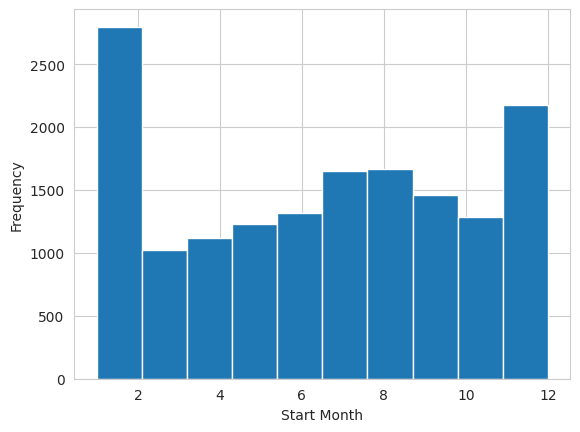

In [ ]:
# Print basic statistical summary of the column
print(df['Start Month'].describe())

# Generate a histogram of the columna
plt.hist(df['Start Month'], bins=10)
plt.xlabel('Start Month')
plt.ylabel('Frequency')
plt.show()

only 314 values missing
majority of disaster start in first month (1765)

8th month stands second and the least is March month

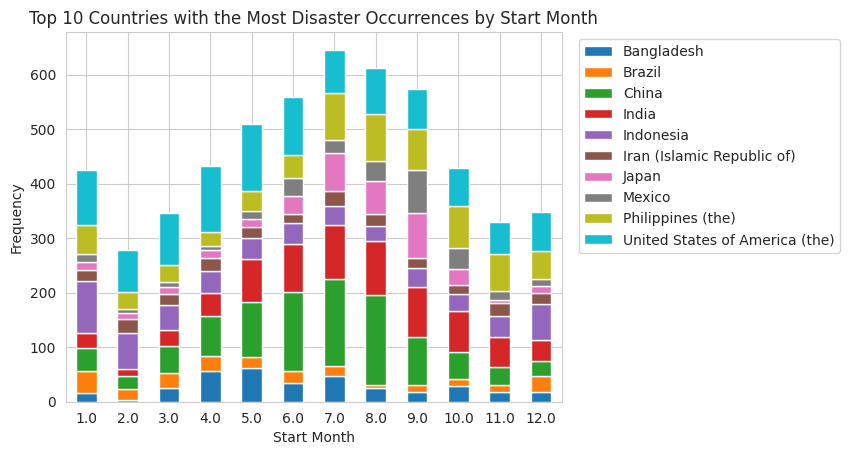

In [ ]:
#13.bivariate - start month - countries


top_countries = df['Country'].value_counts().nlargest(10).index.tolist()
grouped = df[df['Country'].isin(top_countries)].groupby(['Start Month', 'Country']).size().reset_index(name='Count')

# Pivot the data to create a matrix with start month as rows, country as columns, and count as values
pivoted = grouped.pivot(index='Start Month', columns='Country', values='Count')
pivoted.plot(kind='bar', stacked=True)
plt.xlabel('Start Month')
plt.ylabel('Frequency')
plt.title('Top 10 Countries with the Most Disaster Occurrences by Start Month')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


USA has its disasters most started on April and May
China - July and August
India - 7th to 9th month similar
7th month july - started disaster higher globally (among top 10 countries taken)

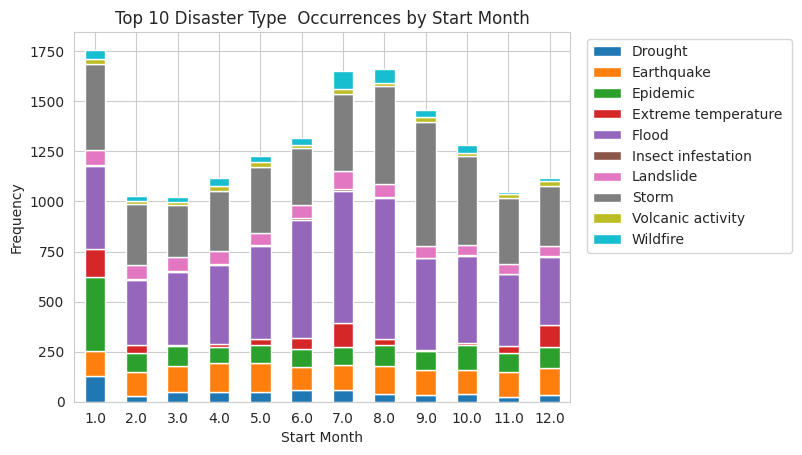

In [ ]:
#14. bivariate - start month - Disaster type
top_countries = df['Disaster Type'].value_counts().nlargest(10).index.tolist()
grouped = df[df['Disaster Type'].isin(top_countries)].groupby(['Start Month', 'Disaster Type']).size().reset_index(name='Count')

# Pivot the data to create a matrix with start month as rows, country as columns, and count as values
pivoted = grouped.pivot(index='Start Month', columns='Disaster Type', values='Count')
pivoted.plot(kind='bar', stacked=True)
plt.xlabel('Start Month')
plt.ylabel('Frequency')
plt.title('Top 10 Disaster Type  Occurrences by Start Month')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

January has witnessed highest disaster rate globally
Least was in March 

12. End Year

Represent end year of disaster

In [ ]:
#missing values
df['End Year'].isna().sum()

0

In [ ]:
df['End Year'].dtype

dtype('int64')

In [ ]:
df['End Year'].describe()

count    16126.000000
mean      1996.835607
std         20.143010
min       1900.000000
25%       1989.000000
50%       2001.000000
75%       2011.000000
max       2021.000000
Name: End Year, dtype: float64

In [ ]:
# Checking for invalid values
(df['End Year'] < 0 ).sum()

0

In [ ]:
#frequency table
end_year_freq = df['End Year'].value_counts()
end_year_freq

2000    521
2002    513
2006    487
2005    458
2007    450
       ... 
1904      4
1916      3
1908      3
1901      2
1921      2
Name: End Year, Length: 122, dtype: int64

No null values
Majority of disaster ended at 2000 (521)

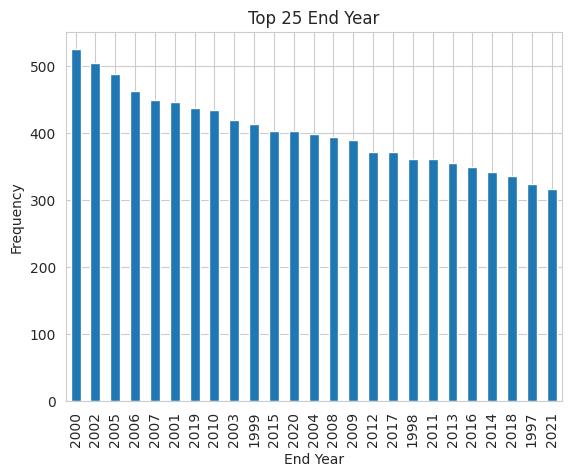

In [ ]:
#freq visualisation

end_year_freq_top25 = df['Start Year'].value_counts().nlargest(25)
end_year_freq_top25.plot.bar()
plt.title('Top 25 End Year')
plt.xlabel('End Year')
plt.ylabel('Frequency')
plt.show()

It shows majorit of disaster ended in 2000
9 out of top 10 ended in 2000s which might indicate it also began in this century


In [ ]:
#Summary statistics
mean = df['End Year'].mean()
median = df['End Year'].median()
mode = df['End Year'].mode()
std_dev = df['End Year'].std()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard deviation:', std_dev)

Mean: 1996.8356070941336
Median: 2001.0
Mode: 0    2000
Name: End Year, dtype: int64
Standard deviation: 20.14300993559608


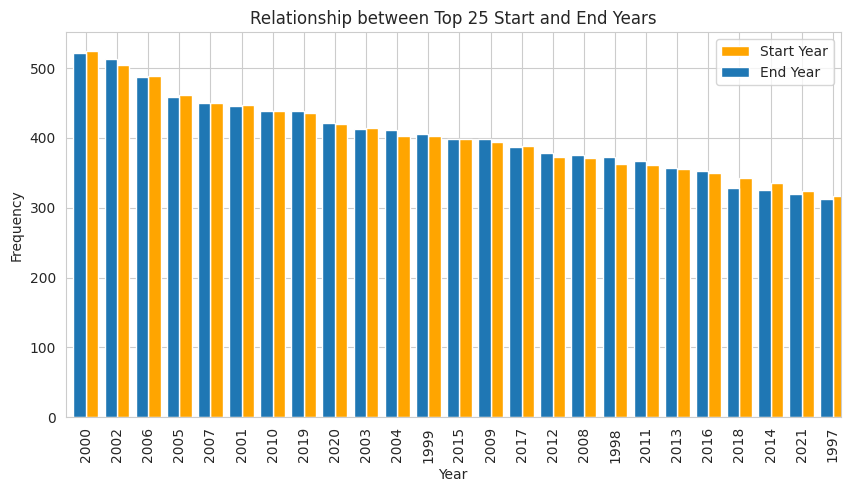

In [ ]:
#15. Bivariate - Start Year vs End Year

top_start_years = df['Start Year'].value_counts().nlargest(25)
top_end_years = df['End Year'].value_counts().nlargest(25)

# barplot
fig, ax = plt.subplots(figsize=(10, 5))
top_start_years.plot(kind='bar', ax=ax, position=0, width=0.4,color = 'orange', label='Start Year')
top_end_years.plot(kind='bar', ax=ax, position=1, width=0.4, label='End Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Relationship between Top 25 Start and End Years')
plt.legend()
plt.show()

Most disasters began and end in same year or one year apart

13. END MONTH

The month when the disaster ended. This  is well defined for all sudden-impact disasters. For disaster situations ending over a longer time period (i.e. drought) with no definite concluding date, the field  can be left blank.

In [ ]:
#missing values
df['End Month'].isna().sum()

708

In [ ]:
df['End Month'].dtype

dtype('float64')

In [ ]:
df['End Month'].describe()

count    15418.000000
mean         6.576728
std          3.352965
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: End Month, dtype: float64

In [ ]:
# Checking for invalid values
(df['End Month'] < 0 ).sum()

0

In [ ]:
#frequency table
End_Month_frequency=df['End Month'].value_counts()
End_Month_frequency

8.0     1711
7.0     1547
9.0     1522
1.0     1408
10.0    1300
6.0     1236
5.0     1233
12.0    1135
4.0     1097
2.0     1091
11.0    1074
3.0     1064
Name: End Month, dtype: int64

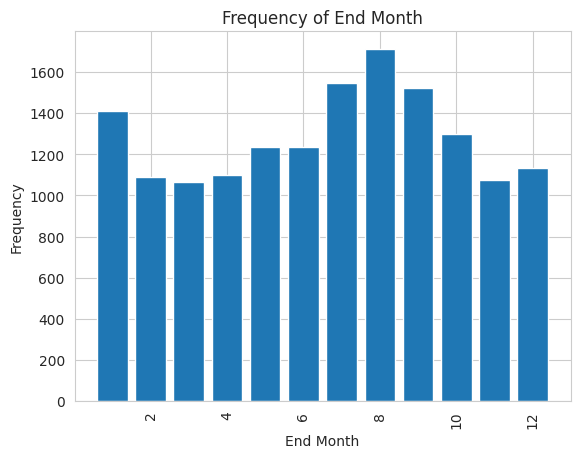

In [ ]:
plt.bar(End_Month_frequency.index,End_Month_frequency.values)
plt.xticks(rotation=90)
plt.xlabel('End Month')
plt.ylabel('Frequency')
plt.title('Frequency of End Month')
plt.show()

*#This dataset shows that eighth month having higher disaster frequency and lower in third and eleventh month.*

In [ ]:
#Summary statistics
mean = df['End Month'].mean()
median = df['End Month'].median()
mode = df['End Month'].mode()
std_dev = df['End Month'].std()

In [ ]:
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard deviation:', std_dev)

Mean: 6.57672849915683
Median: 7.0
Mode: 0    8.0
Name: End Month, dtype: float64
Standard deviation: 3.3529654424001145


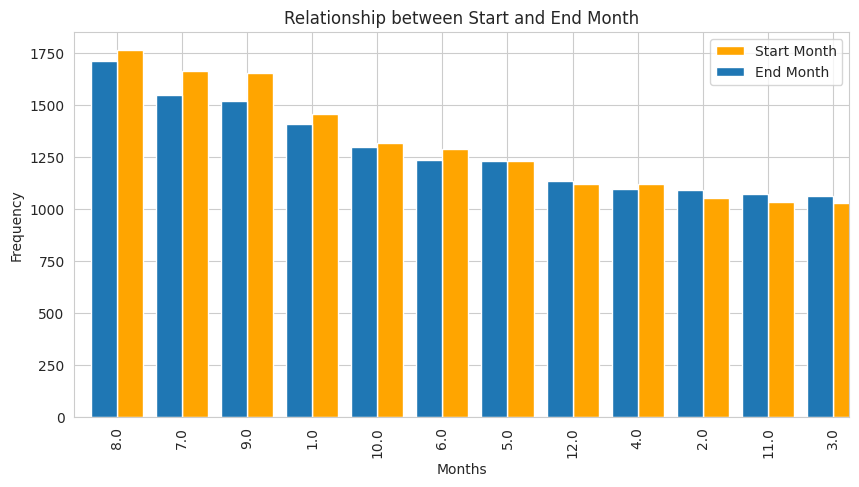

In [ ]:
#16. bivariate - start month - end month

top_start_month = df['Start Month'].value_counts().nlargest(25)
top_end_month = df['End Month'].value_counts().nlargest(25)

# barplot
fig, ax = plt.subplots(figsize=(10, 5))
top_start_month.plot(kind='bar', ax=ax, position=0, width=0.4,color = 'orange', label='Start Month')
top_end_month.plot(kind='bar', ax=ax, position=1, width=0.4, label='End Month')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Relationship between Start and End Month')
plt.legend()
plt.show()

14.Total Deaths

The column "Total Deaths" contains information about the total number of deaths resulting from various types of disasters that occurred between 1900 and 2021. 

Total number of people died. (10 or more cases – deaths + missing people)

In [ ]:
Total_Deaths_missing_values = df['Total Deaths'].isnull().sum()
Total_Deaths_missing_values

4713

In [ ]:
# Calculate the percentage of missing values
percentage_missing_values = (Total_Deaths_missing_values / len(df)) * 100
percentage_missing_values

29.226094505767087

**There are 4713 missing values in the "Total Deaths" column, which represents 29.23% of the total values in the column.**

In [ ]:
df['Total Deaths'].describe()

count    1.141300e+04
mean     2.842866e+03
std      6.860595e+04
min      1.000000e+00
25%      6.000000e+00
50%      2.000000e+01
75%      6.300000e+01
max      3.700000e+06
Name: Total Deaths, dtype: float64

In [ ]:
mean_total_deaths = df['Total Deaths'].mean()
median_total_deaths = df['Total Deaths'].median()
mode_total_deaths = df['Total Deaths'].mode()
print('Mean Total Deaths:', mean_total_deaths)
print('Median Total Deaths:', median_total_deaths)
print('Mode Total Deaths:', mode_total_deaths)

Mean Total Deaths: 2842.86550424954
Median Total Deaths: 20.0
Mode Total Deaths: 0    1.0
Name: Total Deaths, dtype: float64


In [ ]:
Total_Deaths_frequency=df['Total Deaths'].value_counts().head(25)
Total_Deaths_frequency

1.0      772
2.0      649
3.0      537
4.0      404
5.0      335
10.0     329
6.0      317
11.0     289
12.0     266
7.0      260
9.0      231
20.0     227
8.0      216
13.0     197
15.0     197
16.0     171
14.0     171
18.0     136
17.0     129
30.0     126
22.0     120
100.0    120
25.0     118
21.0     115
50.0     111
Name: Total Deaths, dtype: int64

The most frequent value in the "Total Deaths" column is 1 (772)

In [ ]:
highest_val_death=df['Total Deaths'].nlargest(25)
highest_val_death

111      3700000.0
97       3000000.0
902      2500000.0
58       2000000.0
276      2000000.0
152      1900000.0
20       1500000.0
145      1500000.0
1355     1500000.0
16       1300000.0
1        1250000.0
911      1200000.0
56        500000.0
59        500000.0
138       500000.0
86        423000.0
47        393000.0
73        300000.0
519       300000.0
2281      300000.0
721       242000.0
11487     222570.0
850       200000.0
53        180000.0
8805      165708.0
Name: Total Deaths, dtype: float64

37 laksh is the higehst death rate. 
the disasetr type caused this death has been plotted before refer it

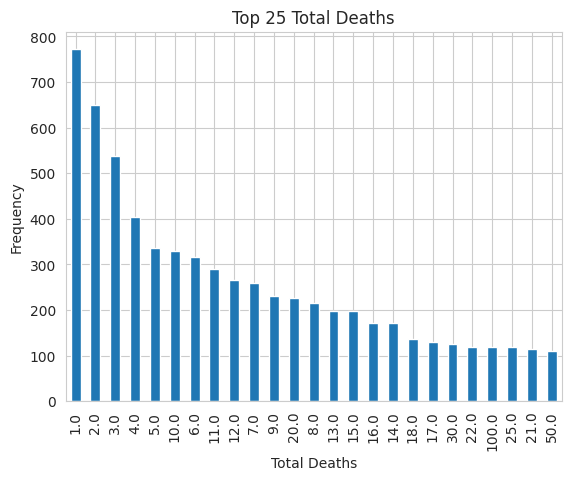

In [ ]:
top_25 = df['Total Deaths'].value_counts().nlargest(25)
top_25.plot.bar()
plt.title('Top 25 Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.show()

**The top 25 most frequent values in the "Total Deaths" column range from 1 to 100, with the highest frequency being 1

In [ ]:
#17. Bivariate - Total Death vs Thier corresponding County
cols = ['Country', 'Total Deaths']
subset_df = df[cols]

In [ ]:
# Group the data by Country, and calculate the sum of total deaths
grouped_df = subset_df.groupby('Country').agg({'Total Deaths': 'sum'}).reset_index()

In [ ]:
#data in descending order of total deaths
sorted_df = grouped_df.sort_values(by='Total Deaths', ascending=False)

In [ ]:
top_countries = df['Country'].value_counts().nlargest(10).index

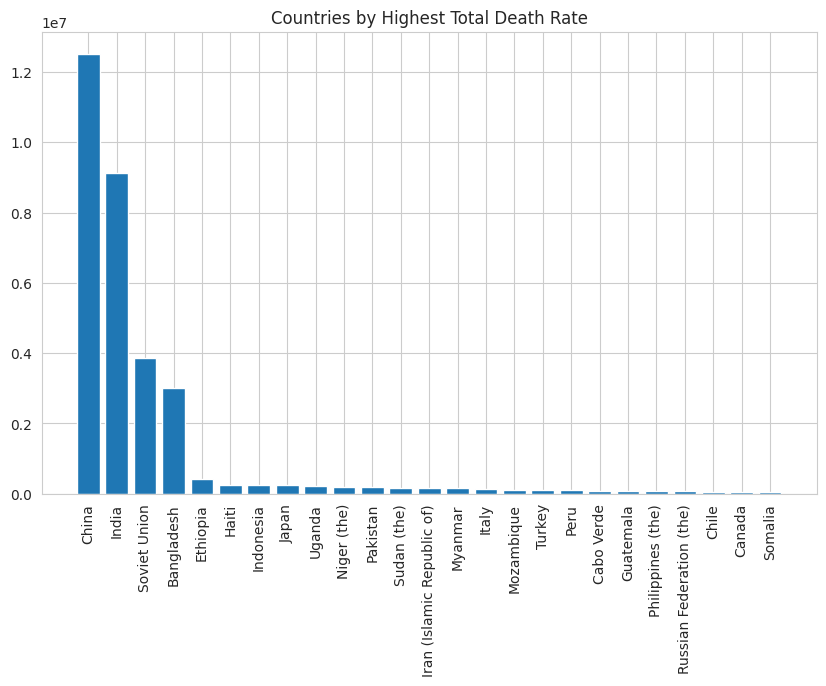

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Countries by Highest Total Death Rate')
plt.bar(sorted_df['Country'][:25], sorted_df['Total Deaths'][:25])
plt.xticks(rotation=90)
plt.show()

**The countries with the highest number of deaths from natural disasters are primarily located in Asia and Africa.
China and India have a significantly higher number of deaths than any other country, indicating that they have been the most affected by natural disasters.
The total number of deaths decreases significantly after the first two countries, with the next few countries having less than 4% of the total deaths.**

In [ ]:
#18..bivariate total death - top 10 frequent countires
top_countries = df['Country'].value_counts().nlargest(10).index
top_subgroups = df['Total Deaths'].value_counts().nlargest(10).index
filtered_data = df[df['Country'].isin(top_countries) & df['Total Deaths'].isin(top_subgroups)]

In [ ]:
grouped = df.groupby(['Country', 'Total Deaths']).sum().reset_index()

In [ ]:
top_10_countries = df['Country'].value_counts().nlargest(10).index
top_10_data = grouped[grouped['Country'].isin(top_10_countries)]

In [ ]:
# Group the data by country and sum up the total deaths for each country
total_deaths_by_country = top_10_data.groupby('Country')['Total Deaths'].sum()

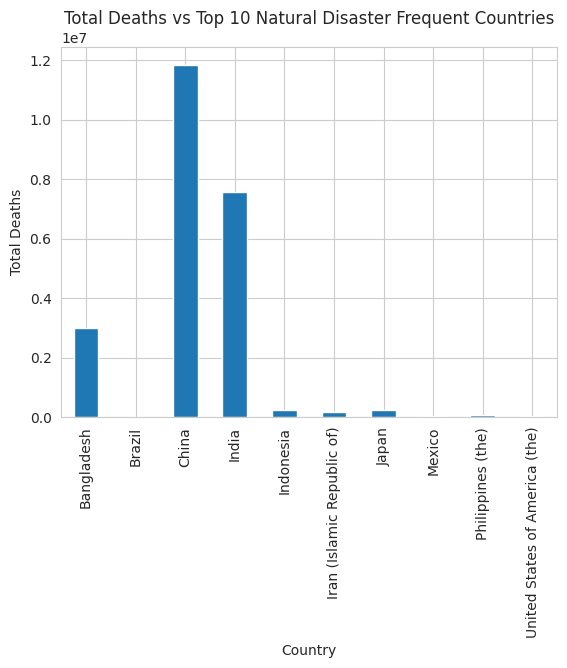

In [ ]:
ax = total_deaths_by_country.plot(kind='bar')
ax.set_ylabel('Total Deaths')
ax.set_xlabel('Country')
plt.title('Total Deaths vs Top 10 Natural Disaster Frequent Countries')
plt.show()



1.China and India are the countries with the highest number of deaths due to 
natural disasters

2.Japan, the United States of America, and Italy are the countries with the lowest number of deaths among the top 10 countries.

3.Despite having a lower frequency of natural disasters compared to China and 
India, the countries of the former Soviet Union have a significantly higher number of deaths.

4.Bangladesh, Haiti, and Uganda are also among the countries with a high number of deaths, despite not having as many natural disasters as China and India.

15. Number of Affected 

No of people affected/injured/homeless. 
100 or more cases are only recorded

In [ ]:
df['No Affected'].isna().sum()

6906

In [ ]:
df['No Affected'].unique()

array([      nan, 3.000e+06, 6.350e+05, ..., 8.900e+01, 2.238e+04,
       6.798e+04])

In [ ]:
df['No Affected'].describe()

count    9.220000e+03
mean     8.823612e+05
std      8.573913e+06
min      1.000000e+00
25%      1.244750e+03
50%      1.000000e+04
75%      9.182300e+04
max      3.300000e+08
Name: No Affected, dtype: float64

The variable has a wide range of values,  with a mean of 882,361 and a standard deviation of 8.573913.




In [ ]:
mean_No_Affected = df['No Affected'].mean()
median_No_Affected = df['No Affected'].median()
mode_No_Affected = df['No Affected'].mode()
print('Mean No Affected:', mean_No_Affected)
print('Median No Affected:', median_No_Affected)
print('Mode No Affected:', mode_No_Affected)

Mean No Affected: 882361.2424078091
Median No Affected: 10000.0
Mode No Affected: 0    1000.0
Name: No Affected, dtype: float64


In [ ]:
No_Affected_frequency=df['No Affected'].value_counts().head(10)
No_Affected_frequency

1000.0      190
2000.0      172
5000.0      156
3000.0      149
10000.0     148
300.0       135
20000.0     131
200.0       128
600.0       116
100000.0    112
Name: No Affected, dtype: int64

1000 poepl has been affected in high frequency over and over 190 times

In [ ]:
highestval_affected=df['No Affected'].nlargest(10)
highestval_affected

13577    330000000.0
3285     300000000.0
8019     300000000.0
5365     223000000.0
3929     206000000.0
1609     200000000.0
5275     150000000.0
8633     150000000.0
11315    134000000.0
4677     128000000.0
Name: No Affected, dtype: float64

But highest value in affected cases is 33 Cr, 30 Cr twice and so on
Which shows how drastically a disaster can affect a country and its people

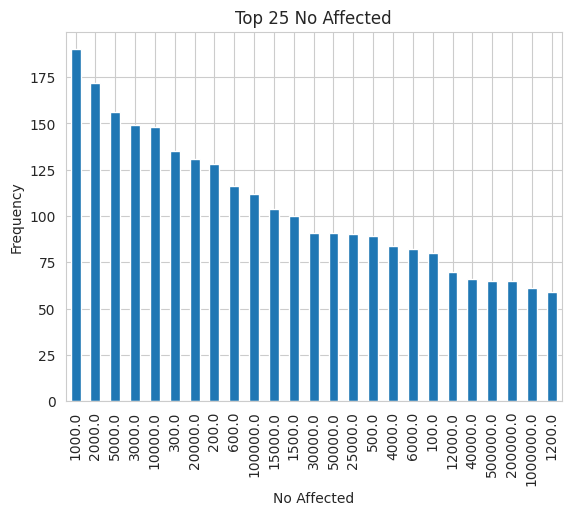

In [ ]:
top_25 = df['No Affected'].value_counts().nlargest(25)
top_25.plot.bar()
plt.title('Top 25 No Affected')
plt.xlabel('No Affected')
plt.ylabel('Frequency')
plt.show()

The top 25 values range from 1000 to 1000000. which shows the average range of any disaster affecting
 


16. Total Affected

The total affected is the sum of injured, affected and homeless.


In [ ]:
Total_Affected_missing_values = df['Total Affected'].isnull().sum()
Total_Affected_missing_values

4509

In [ ]:
# Calculate the percentage of missing values
percentage_missing_values = (Total_Affected_missing_values / len(df)) * 100
percentage_missing_values

27.961056678655588

**There are 4,509 missing values, which account for 27.96% of the total values.**

In [ ]:
df['Total Affected'].describe()

count    1.161700e+04
mean     7.165088e+05
std      7.718598e+06
min      1.000000e+00
25%      6.500000e+02
50%      5.965000e+03
75%      5.825500e+04
max      3.300000e+08
Name: Total Affected, dtype: float64

In [ ]:
mode_Total_Affected = df['Total Affected'].mode()
print('Mode ', mode_Total_Affected)

Mode  0    2000.0
Name: Total Affected, dtype: float64


In [ ]:
Total_Affected_frequency_top25=df['Total Affected'].value_counts().head(25)
Total_Affected_frequency_top25

2000.0       211
1000.0       198
200.0        187
3000.0       147
300.0        139
5000.0       135
10000.0      133
100.0        126
600.0        110
500.0        102
1500.0        97
20000.0       95
25000.0       84
30000.0       83
100000.0      83
6000.0        80
15000.0       76
50000.0       75
4000.0        74
12000.0       61
2500.0        61
1200.0        53
40000.0       52
150.0         52
1000000.0     50
Name: Total Affected, dtype: int64

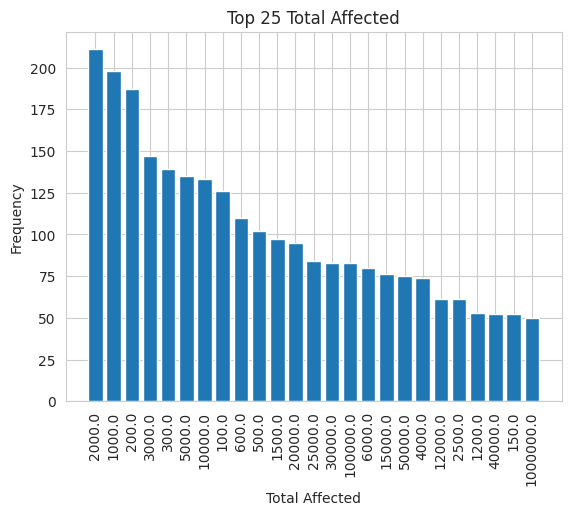

In [ ]:
total_affected_counts = df['Total Affected'].value_counts()
plt.bar(Total_Affected_frequency_top25.index.astype(str), Total_Affected_frequency_top25.values)
plt.title('Top 25 Total Affected')
plt.xlabel('Total Affected')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

The most frequent value for 'Total Affected' is 2000 

The top 25 values range from 2000 to 40000


In [ ]:
Total_Affected_highest=df['Total Affected'].nlargest(25)
Total_Affected_highest

13577    330000000.0
3285     300000000.0
8019     300000000.0
5365     238973000.0
3929     210232227.0
1609     200000000.0
5275     154634000.0
8633     150146000.0
11315    134000000.0
4677     128000000.0
5223     114470249.0
10322    105004000.0
6530     101024000.0
3834     100010000.0
1355     100000000.0
2917     100000000.0
7890     100000000.0
13926     85000012.0
5157      82000000.0
7864      80035257.0
5147      78974400.0
10520     77000000.0
11522     67900000.0
7907      60000000.0
11210     60000000.0
Name: Total Affected, dtype: float64

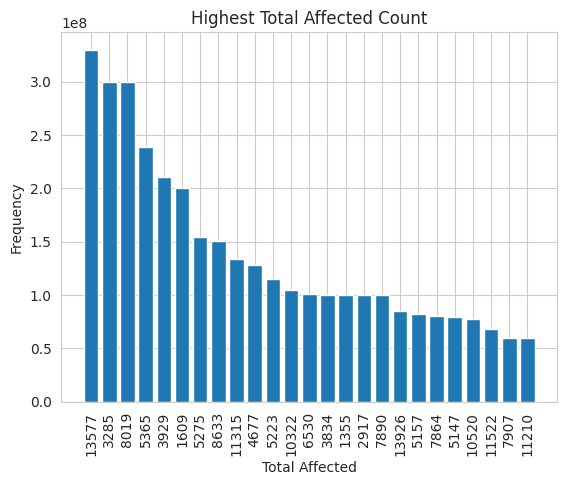

In [ ]:
plt.bar(Total_Affected_highest.index.astype(str), Total_Affected_highest.values)
plt.title('Highest Total Affected Count')
plt.xlabel('Total Affected')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

33Cr is the highest value of total affected with a frequency of  13577, which is extremely high and serius number

17. TOTAL DAMAGES

 A value of all damages and economic losses directly or indirectly related to the disaster. The information may include the breakdown figures by sectors: Social, Infrastructure, Production, Environment and other (when available).

In [ ]:
df["Total Damages ('000 US$)"].isna().sum()

10881

In [ ]:
df["Total Damages ('000 US$)"].describe()

count    5.245000e+03
mean     7.247835e+05
std      4.723131e+06
min      2.000000e+00
25%      8.300000e+03
50%      6.000000e+04
75%      3.173000e+05
max      2.100000e+08
Name: Total Damages ('000 US$), dtype: float64

In this, there are 10881 missing values.

In [ ]:
x=df["Total Damages ('000 US$)"].mean()

In [ ]:
x

724783.5428026692

In [ ]:
x=df["Total Damages ('000 US$)"].median()

In [ ]:
x

60000.0

In [ ]:
x=df["Total Damages ('000 US$)"].mode()

In [ ]:
x

0    100000.0
Name: Total Damages ('000 US$), dtype: float64

This column shows median  60000, mode 100000 and mean 724783.  which shows most recorded total damage in 100000 USD

In [ ]:
Total_Damage_frequency=df["Total Damages ('000 US$)"].value_counts().head(10)
Total_Damage_frequency

100000.0     177
10000.0      141
1000.0       135
2000.0       134
5000.0       109
50000.0      103
20000.0       85
200000.0      80
1000000.0     80
500000.0      79
Name: Total Damages ('000 US$), dtype: int64

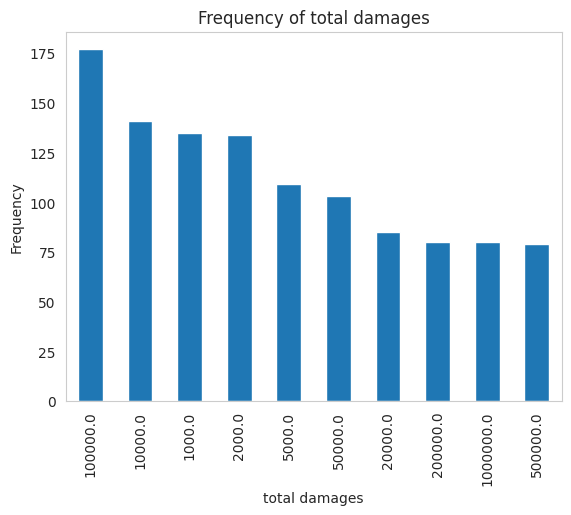

In [ ]:
Total_Damage_frequency.plot.bar()
plt.title('Frequency of total damages')
plt.xlabel('total damages')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Most frequent recorded total damage is 100000 USD (177 times)

In [ ]:
highest_total_damages=df["Total Damages ('000 US$)"].nlargest(10)
highest_total_damages

11933    210000000.0
9844     125000000.0
5530     100000000.0
14871     95000000.0
10490     85000000.0
14353     68000000.0
14894     57000000.0
12923     50000000.0
11943     40000000.0
5102      30000000.0
Name: Total Damages ('000 US$), dtype: float64

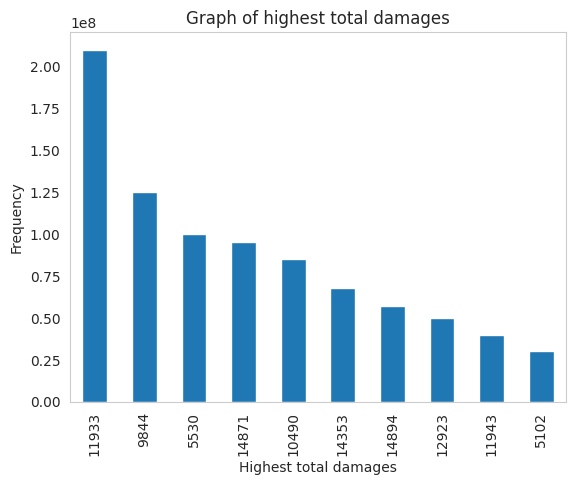

In [ ]:
highest_total_damages.plot.bar()
plt.title('Graph of highest total damages')
plt.xlabel('Highest total damages')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Highest total damages recorded in the dataset is 2*10^8 and that too 11933 times

Multivariate

In [ ]:
# select columns of interest
selected_data = df[['Country', 'Disaster Type', 'Total Deaths']]

In [ ]:
# calculate the total number of people deaths for each country
country_data = selected_data.groupby('Country').sum()['Total Deaths'].reset_index()

In [ ]:

top_countries = country_data.sort_values(by='Total Deaths', ascending=False).head(10)['Country']

In [ ]:

filtered_data = selected_data[selected_data['Country'].isin(top_countries)]

In [ ]:

grouped_data = filtered_data.groupby(['Country', 'Disaster Type']).sum()['Total Deaths'].reset_index()

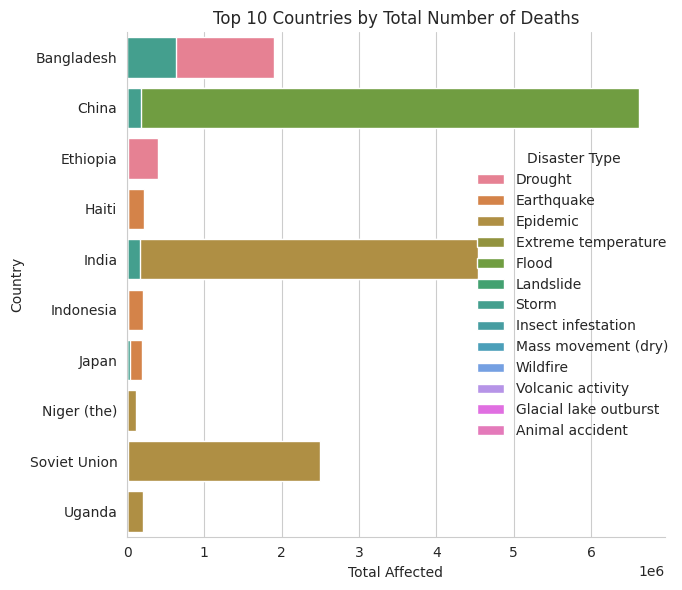

In [ ]:
 # Create the grouped bar chart
sns.set_style("whitegrid")
sns.catplot(x="Total Deaths", y="Country", hue="Disaster Type", data=grouped_data, kind="bar", height=6, aspect=0.8, dodge=False, width=0.8, palette="husl")
plt.xlabel("Total Affected", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 10 Countries by Total Number of Deaths", fontsize=12)
plt.tight_layout()
plt.show()

The graph shows that China has the highest number of total deaths due to disasters, with over 700,000 deaths, followed by India,Bangladesh and SovietUnion. Floods are the most common cause of death followed by Epidemics and Drought
Overall, the graph highlights the devastating impact of natural disasters on human life and emphasizes the need for preparedness and disaster management strategies to minimize the loss of life and property.

In [ ]:
# Select columns of interest
selected_data = df[['Country', 'Disaster Type', 'Total Affected']]

In [ ]:
# Calculate the total number of people affected for each country
country_data = selected_data.groupby('Country').sum()['Total Affected'].reset_index()

In [ ]:

top_countries = country_data.sort_values(by='Total Affected', ascending=False).head(10)['Country']

In [ ]:

filtered_data = selected_data[selected_data['Country'].isin(top_countries)]

In [ ]:

grouped_data = filtered_data.groupby(['Country', 'Disaster Type']).sum()['Total Affected'].reset_index()

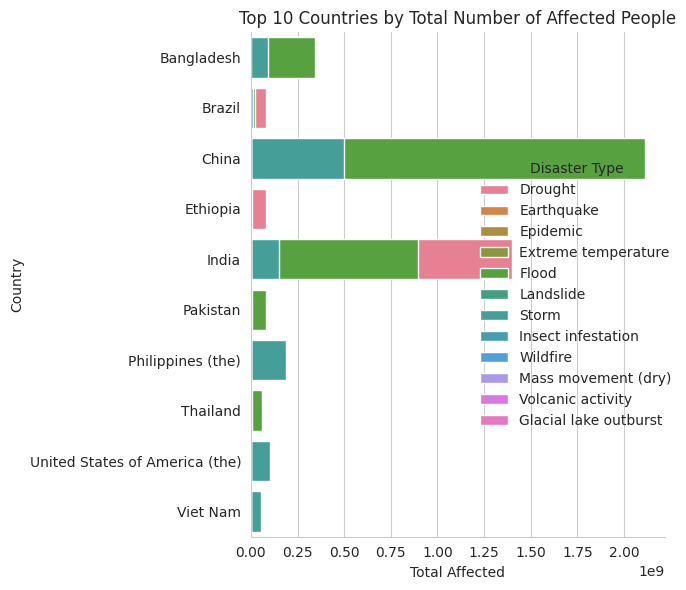

In [ ]:
 # Create the grouped bar chart
sns.set_style("whitegrid")
sns.catplot(x="Total Affected", y="Country", hue="Disaster Type", data=grouped_data, kind="bar", height=6, aspect=0.8, dodge=False, width=0.8, palette="husl")
plt.xlabel("Total Affected", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 10 Countries by Total Number of Affected People", fontsize=12)
plt.tight_layout()
plt.show()

The graph shows the top 10 countries by the total number of people affected by different types of disasters. Each bar represents a country, and the height of the bar represents the total number of people affected by all types of disasters. The different colors within each bar represent different types of disasters.

From the graph, we can see that China has the highest number of people affected, followed by India. Floods and storms are the most common types of disasters affecting these countries. We can also see that the types of disasters affecting each country vary.

1.Total Affected - missing value handling, outlier detection and data encoding

**Missing Value Handling**

In [ ]:
# Check for missing values in the dataframe
print(df['Total Affected'].isnull().sum())

4509


#####There are 4,509 missing values in the 'Total Affected' column.

In [ ]:
print("Skewness of Total affected column:", skew(df["Total Affected"]))

Skewness of Total affected column: nan


the column has high null value and is highly skewed, not normally distributed it is not ideal to use mean/median imputation, knn (not best when normal distribution) or ml models. best to drop or fill with some constants, so choose it or do mean as did here?

In [ ]:
# Fill in missing values using mean imputation
df['Total Affected'].fillna(df['Total Affected'].mean(), inplace=True)

In [ ]:
print(df['Total Affected'].isnull().sum())

0


In [ ]:
print("Skewness of Total affected column:", skew(df["Total Affected"]))

Skewness of Total affected column: 31.765349447186136


In [ ]:
df['Total Affected'].describe()

count    1.612600e+04
mean     7.165088e+05
std      6.551140e+06
min      1.000000e+00
25%      1.700000e+03
50%      3.140500e+04
75%      7.165088e+05
max      3.300000e+08
Name: Total Affected, dtype: float64

#####The missing values have been filled using mean imputation.

**Outlier Detection**

<Axes: xlabel='Total Affected'>

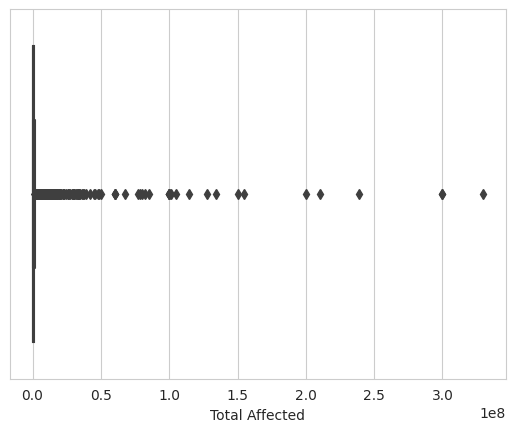

In [ ]:
#Visualize the distribution of the column using a box plot
sns.boxplot(x=df["Total Affected"])

#####The distribution of the 'Total Affected' column is positively skewed, as evidenced by the mean being greater than the median.

#####The boxplot of the 'Total Affected' column shows the presence of several outliers.

In [ ]:
#Calculate the upper and lower bounds for outlier detection using the interquartile range (IQR)
Q1 = df["Total Affected"].quantile(0.25)
Q3 = df["Total Affected"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)

Upper bound: 1788721.8797882413
Lower bound: -1070513.1278729448


The upper bound for outlier detection is 1,788,721.88 and the lower bound is -1,070,513.13.

In [ ]:
#Identify the outliers in the  based on the upper and lower bounds
outliers = df[(df["Total Affected"] < lower_bound) | (df["Total Affected"] > upper_bound)]
print("Number of outliers:", len(outliers))
print("Outlier values:", outliers.values)

Number of outliers: 547
Outlier values: [[1915 11 nan ... nan nan nan]
 [1918 15 nan ... nan nan nan]
 [1920 9003 nan ... nan nan nan]
 ...
 [2021 9510 'DR-2021-000089' ... nan nan nan]
 [2021 9548 nan ... nan nan nan]
 [2021 9548 nan ... nan nan nan]]


Could see there are total of 547 outliers

In [ ]:
#remove outliers using iqr
emdat_df = df[(df['Total Affected'] >= lower_bound) & (df['Total Affected'] <= upper_bound)].copy()
#new copy of dataset with ouliers removed and in orignal too
df = df[(df['Total Affected'] >= lower_bound) & (df['Total Affected'] <= upper_bound)]

2.Country - missing val handling, outlier detection, encoding

**Missing Value Handling**

In [ ]:
# Check for missing values in the dataframe
print(df['Country'].isnull().sum())

0


we can infer that there are no missing values in the "Country" column.

**Outlier Detection**

Outlier detection is typically applied to numerical data to identify extreme values that are significantly different from other values in the data. For categorical data, such as the "Country" column in this case, outlier detection is not applicable as there are no numerical values to compare.

**Data Encoding**

In [ ]:
# Encode the "Country" column using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

country_col = df["Country"].values.reshape(-1, 1)
# Create an instance of OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data
encoded = oh_encoder.fit_transform(country_col)

# Convert the encoded data to a DataFrame and concatenate with the original dataset
encoded_df = pd.DataFrame(encoded.toarray(), columns=oh_encoder.get_feature_names_out())

# Drop the original "Country" column
#df.drop("Country", axis=1, inplace=True)

# Concatenate the original dataset with the encoded columns
df = pd.concat([df, encoded_df], axis=1)
df.to_csv ('updated_dataset.csv', index=False)


In [ ]:
new_filename = 'updated_dataset.csv'
df.to_csv(new_filename, index=False)

# Download 
from google.colab import files
files.download(new_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The "Country" column has been encoded using one-hot encoding, resulting in the creation of new columns for each unique value in the "Country" column. Each row in the new columns is represented by a binary value indicating the presence or absence of that country in the original row.

3.ISO

**Missing Value Handling**

In [ ]:
# Check for missing values in the dataframe
df = pd.read_csv ('updated_dataset.csv')
print(df['ISO'].isnull().sum())

0


 there are no missing values in the "ISO" column 

**Outlier Detection**

As the "ISO" column is categorical, outlier detection is not applicable.

**Data Encoding**

In [ ]:
# Create a LabelEncoder instance
le = LabelEncoder()
le

LabelEncoder()

In [ ]:
# Fit and transform the "ISO" column
df["ISO_Code"] = le.fit_transform(df["ISO"].astype(str))
#df["ISO_Code"]

df = pd.concat([df, df["ISO_Code"]], axis=1)

df.drop("ISO", axis=1, inplace=True)

df.to_csv('updated_dataset.csv', index=False)

 The LabelEncoder object is used to convert each unique value in the "ISO" column to a numerical code. The result is a new column called "ISO_Code" which contains the numerical codes.
And the output  shows that the "ISO" column has been successfully encoded and now has numerical values ranging from 0 to 264.

4.Disaster Subtype

**Missing Value Handling**

In [ ]:
# Check for missing values in the dataframe
print(df['Disaster Subtype'].isnull().sum())

3110


In [ ]:
print(df['Disaster Subtype'].dtype)

object


In [ ]:
#replacing with notspecified
df['Disaster Subtype'] = df['Disaster Subtype'].fillna('Not Specifies',inplace = True)

 Since there are 3110 missing values, missing values are random, and there is no specific pattern in the missingnes better to fill with unknown/not recorded etc


**Outlier Detection**


 since the "Disaster Subtype" column is an object data type, it cannot be used for outlier detection as there are no numerical values to compare.

**Date Encoding**

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()
le

LabelEncoder()

In [ ]:
# Fit and transform the "Disaster Subtype" column
df["Disaster Subtype Encoded"] = le.fit_transform(df["Disaster Subtype"].astype(str))

df = pd.concat([df, df["Disaster Subtype Encoded"]], axis=1)

df.drop("Disaster Subtype", axis=1, inplace=True)


In [ ]:
df = df.loc[:, ~df.columns.duplicated()]
df.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subsubtype', 'Event Name', 'Country',
       'Region',
       ...
       'x0_Virgin Island (U.S.)', 'x0_Wallis and Futuna', 'x0_Yemen',
       'x0_Yemen Arab Rep', 'x0_Yemen P Dem Rep', 'x0_Yugoslavia', 'x0_Zambia',
       'x0_Zimbabwe', 'ISO_Code', 'Disaster Subtype Encoded'],
      dtype='object', length=273)

 The LabelEncoder object is used to encode the "Disaster Subtype" column into numerical.The encoded data is then stored in a new column called "Disaster Subtype Code".

5. Region - missing value handling, outlier detection, data encoding


In [ ]:
df['Region'].isnull().sum()

0

There are no mising values in this column. So can move to next step.
Since categorical no need for checking outlier. But can inspect unusal/unexpected values through value_counts, but already done that in uva and found its reasonable since southernasia has high disaster occurance


Data encoding

Since no meaningful ordinal relationship between regions, its ideal to use onehot encoder since lencoder values may not have any inherent meaning, and using them in a model could result in incorrect inferences.

In [ ]:
#onehot encoder

onehot_encoder = OneHotEncoder()
region_encoded = onehot_encoder.fit_transform(df[['Region']])
region_encoded_df = pd.DataFrame(region_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['Region']))
region_encoded_df = region_encoded_df.iloc[:, :-1]
df = pd.concat([df, region_encoded_df], axis=1)

# drop the original region column
df.drop('Region', axis=1, inplace=True)

6. Declaration


In [ ]:
df['Declaration'].isnull().sum()

12870

In [ ]:
df['Declaration'].value_counts()

No     2342
Yes     914
Name: Declaration, dtype: int64

In [ ]:
#filling with 'Not Specified'
df['Declaration'].fillna('Not Specified',inplace = True)

No need of outlier, since its categorical

Encoding

In [ ]:
#label encoding - 
#more suitable onehot since no meaningful reltn between values but no need of it since adtnl cols produced by it might not be even used
#and only has 3 values yes no and not specified
leD = LabelEncoder()
df['Declaration Encoded'] = leD.fit_transform(df['Declaration'])

In [ ]:
df = pd.concat([df, df['Declaration Encoded']], axis=1)
# drop the original region column
df.drop('Declaration', axis=1, inplace=True)

7. Disaster magnitude value

In [ ]:
df['Dis Mag Value'].isnull().sum()

11180

Since the distribution is not normal and there are outliers present, filling the missing values with the median may be a better option. However, it is also important to consider the importance of this column for the model goal of predicting future disasters in the next 20 years.It might not be used for that, and from uva we could see dis mag value was given only for specific disasters. hence can chose to drop this column. is it ideal?

In [ ]:
#df.drop('Dis Mag Value', axis=1, inplace=True)

In [ ]:
#outlier
Q1 = df['Dis Mag Value'].quantile(0.25)
Q3 = df['Dis Mag Value'].quantile(0.75)
IQR = Q3 - Q1

# Find the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Find the outliers
outliers = df[(df['Dis Mag Value'] < lower_bound) | (df['Dis Mag Value'] > upper_bound)]
print("Number of outliers:", len(outliers))
print(outliers)


Number of outliers: 886
         Year     Seq           Glide Disaster Group Disaster Subgroup  \
33     1911.0    18.0             NaN        Natural    Climatological   
618    1974.0  9100.0             NaN        Natural    Climatological   
2296   1985.0   165.0             NaN        Natural      Hydrological   
2297   1985.0   113.0             NaN        Natural      Hydrological   
2315   1985.0   167.0             NaN        Natural      Hydrological   
...       ...     ...             ...            ...               ...   
15450  2019.0   531.0  EP-2019-000139        Natural        Biological   
15461  2020.0   157.0  FL-2020-000130        Natural      Hydrological   
15475  2020.0   301.0             NaN        Natural      Hydrological   
15495  2020.0   283.0   FF-2020-00156        Natural      Hydrological   
15517  2020.0   497.0             NaN        Natural        Biological   

      Disaster Type Disaster Subtype Disaster Subsubtype Event Name  ISO  ...  \
33    

In [ ]:
#removing outliers
df = df[(df['Dis Mag Value'] >= lower_bound) & (df['Dis Mag Value'] <= upper_bound)]

8.Total Damages

In [ ]:
df["Total Damages (\'000 US$)"].isnull().sum()

10881

In [ ]:
df["Total Damages (\'000 US$)"].median()

60000.0

<Axes: xlabel="Total Damages ('000 US$)">

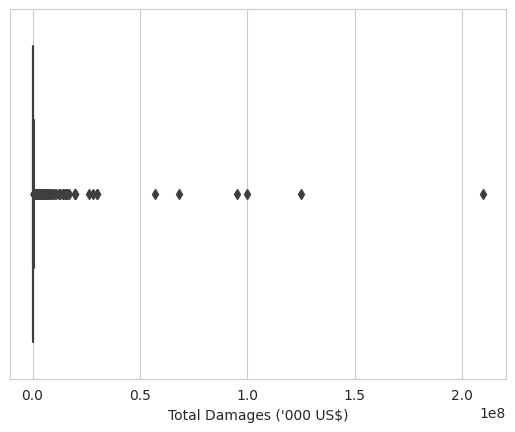

In [ ]:
#outlier
sns.boxplot(x=df["Total Damages ('000 US$)"])

In [ ]:
#outlier
Q1 = df["Total Damages (\'000 US$)"].quantile(0.25)
Q3 = df["Total Damages (\'000 US$)"].quantile(0.75)
IQR = Q3 - Q1

# Find the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Find the outliers and remove
df = df[(df["Total Damages (\'000 US$)"] < lower_bound) | (df["Total Damages (\'000 US$)"] > upper_bound)]

9.End month

In [ ]:
#missing values
df['End Month'].isna().sum()

0

In [ ]:
df['End Month'].describe()

count    252.000000
mean       7.126984
std        3.084427
min        1.000000
25%        5.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: End Month, dtype: float64

In [ ]:
mode = df['End Month'].mode()[0]
df['End Month'].fillna(mode, inplace=True)

In [ ]:
#missing values
df['End Month'].isna().sum()

0


For handling missing values in categorical variables, the mode is the most appropriate measure of central tendency to use. This is because categorical variables do not have a numeric scale, so we cannot use the mean or median as we do with continuous variables

In [ ]:
#check extremevalue present or not   -  no need of outlier
df['End Month'].value_counts()

9.0     48
10.0    36
8.0     29
5.0     20
6.0     19
3.0     18
7.0     17
1.0     15
12.0    15
4.0     15
2.0     10
11.0    10
Name: End Month, dtype: int64

In [ ]:
# Encode the "End Month" column using one-hot encoding
#df_encoded = pd.get_dummies(df, columns=['End Month'])
#df['Declaration Encoded']
#df_encoded 
#end month col are already represented as integers from 1 to 12, is there any need to use any encoding method.

for this column data Encoding is done by using one-hot encoding, resulting in the creation of new columns for each unique value in the "End month" column.  This type of encoding is useful for machine learning algorithms that require numerical data, as categorical data cannot be directly used in many algorithms.

10.Total death

In [ ]:
#missing values
df['Total Deaths'].isna().sum()

18

since total death is kept null for cases there arent even minimum 10 cases recorded, so  the total death column are due to a lack of recorded deaths in those incidents, it may not be appropriate to fill in these missing values using imputation techniques like mean, median or mode. 
Instead, a possible approach could be to leave these values as missing or to impute them with zeros, indicating that no deaths were recorded for those particular incidents. so we are chosing to fill with zero here for convinience

In [ ]:
df['Total Deaths'] = df['Total Deaths'].fillna(0)

In [ ]:
df['Total Deaths'].isna().sum()

0

In [ ]:
#outlier - zscore
z_scores = stats.zscore(df['Total Deaths'])
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
outlier_indices

array([    1,    16,    20,    47,    53,    56,    58,    59,    73,
          86,    97,   111,   138,   145,   152,   276,   519,   721,
         850,   902,   911,  1355,  2281, 11487])

11. No Affected


In [ ]:
df['No Affected'].isna().sum()

103

In [ ]:
df['No Affected'].fillna(0,inplace=True)

In [ ]:
df['No Affected'].isna().sum()

0

we filled null value of this particular column 'No affected' with '0' for dealing null values. This is used because there is large number of null values in this particular column and only record if its 100 or more cases


In [ ]:
#outlier
Q1 = df['No Affected'].quantile(0.25)
Q3 = df['No Affected'].quantile(0.75)
IQR = Q3 - Q1

# Find the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)


Upper bound: 415625.0
Lower bound: -249375.0


In [ ]:
# Find the outliers
df = df[(df["No Affected"] < lower_bound) | (df["No Affected"] > upper_bound)]

The analysis of the data using domain knowledge and techniques has identified the presence of 3040 outliers in the dataset.  

12. START YEAR 

MISSING VALUE HANDLING

In [ ]:
#missing values
df['Start Year'].isna().sum()

0

There is no missing values in this column, which represents the year when the disaster occured.

In [ ]:
df['Start Year'].describe()

count      33.000000
mean     2005.393939
std        11.903097
min      1980.000000
25%      1998.000000
50%      2005.000000
75%      2015.000000
max      2021.000000
Name: Start Year, dtype: float64

13. START MONTH

MISSING VALUE HANDLING

In [ ]:
#missing values
df['Start Month'].isna().sum()

387

There are 387 missing values in the 'Start Month' column.

In [ ]:
#filling with mode
mode_val = df['Start Month'].mode()[0]
df['Start Month'].fillna(mode_val, inplace=True)

The missing values have been filled using mode imputation.Most frequesnt month suits here

In [ ]:
#missing values
df['Start Month'].isna().sum()

0

14. END YEAR

MISSING VALUE HANDLING

In [ ]:
#missing values
df['End Year'].isna().sum()

0

Here, there is no missing values.

Since encding might give large number of additional cols and we ended to keep this feature as numerical itself, encoding is not ideal


15.Year

In [ ]:
#missing values
df['Year'].isna().sum()

0

There is no missing value

Since encding might give large number of additional cols and we ended to keep this feature as numerical itself, encoding is not ideal



And rhe goal is to predict upcoming year's disasters using the year column, then it is not necessary to remove outliers from the year column. Outliers in the year column are unlikely to affect the model's ability to predict future disasters, as long as the data is representative of the distribution of years in which disasters occur.

16. Disaster subtype

In [ ]:
#missing values
df['Disaster Subgroup'].isna().sum()

0

There is no null values

In [ ]:
#encoding - onehot encoder

dissubgroup_onehot_encoder = OneHotEncoder()
subgroup_encoded = dissubgroup_onehot_encoder.fit_transform(df[['Disaster Subgroup']])
subgroup_encoded_df = pd.DataFrame(subgroup_encoded.toarray(), columns=dissubgroup_onehot_encoder.get_feature_names_out(['Disaster Subgroup']))
subgroup_encoded_df = subgroup_encoded_df.iloc[:, :-1]
df = pd.concat([df, subgroup_encoded_df], axis=1)
df.to_csv('encoded_dataset.csv', index=False)


In [ ]:
df.to_csv('encoded_dataset.csv', index=False)
files.download('encoded_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(5)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subsubtype,Event Name,Country,Continent,...,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Declaration Encoded,Declaration Encoded,Disaster Subgroup_Biological,Disaster Subgroup_Climatological,Disaster Subgroup_Extra-terrestrial,Disaster Subgroup_Geophysical,Disaster Subgroup_Hydrological
0,1900,9002,NaN,Natural,Climatological,Drought,NaN,NaN,Cabo Verde,Africa,...,0.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0
1,1900,9001,NaN,Natural,Climatological,Drought,NaN,NaN,India,Asia,...,0.0,0.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0
2,1902,12,NaN,Natural,Geophysical,Earthquake,NaN,NaN,Guatemala,Americas,...,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,NaN,Santa Maria,Guatemala,Americas,...,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,NaN,Santa Maria,Guatemala,Americas,...,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0


17. Disaster Type

In [ ]:
#missing values
df = pd.read_csv('natural_disasters.csv')
df['Disaster Type'].isna().sum()

0

In [ ]:
df['Disaster Type'].nunique()

15

There is no null values

LEncoding may be appropriate if there is no inherent ordering or hierarchy in the categories. and one hot not suitable since 15 types means that much additional cols. binary encoding in this give binary codes from 0000 to 1110. 

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#encoding - binary encoder

import category_encoders as ce

# Create an instance of the BinaryEncoder
distype_binary_encoder = ce.BinaryEncoder(cols=['Disaster Type'])

disaster_type_binary = distype_binary_encoder.fit_transform(df['Disaster Type'])
df = pd.concat([df, disaster_type_binary], axis=1)

In [ ]:
disaster_type_binary

,Disaster Type_0,Disaster Type_1,Disaster Type_2,Disaster Type_3
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
16121,0,1,1,0
16122,0,1,1,0
16123,0,1,1,1
16124,0,1,1,0


In [ ]:
df.to_csv('encoded_dataset.csv', index=False)
files.download('encoded_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature engineering and Feature reduction

In [ ]:
#1. Temporal features (seasons) from start and end month data

df = pd.read_csv('encoded_dataset.csv')
# Define a function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "fall"

# Extract the season feature
df['Season'] = df['Start Month'].apply(month_to_season)
#df['end_season'] = df['End Month'].apply(month_to_season)

# Example usage of the season features
print(df[['Start Month', 'End Month', 'Season']].head())


   Start Month  End Month  Season
0          1.0        8.0  winter
1          1.0        8.0  winter
2          4.0        4.0  spring
3          4.0        4.0  spring
4         10.0       10.0    fall


In [ ]:
df.to_csv('featureEng.csv',index=False)
files.download('featureEng.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.Historical disaster freq - total number of disaster subtype in each country by year upto current year

In [ ]:
d = pd.read_csv('natural_disasters.csv')

In [ ]:
d = d.sort_values('Year')
d['Year'] = pd.to_datetime(d['Year'], format='%Y')

# Create a new column to store the historical disaster frequency
d['historical_disaster_freq'] = 0

# Compute the historical disaster frequency by country and year
for country in d['Country'].unique():
    for year in range(d['Year'].dt.year.min(), d['Year'].dt.year.max() + 1):
        mask = (d['Country'] == country) & (d['Year'].dt.year <= year)
        freq = d.loc[mask, 'Disaster Subtype'].count()
        d.loc[mask, 'historical_disaster_freq'] = freq

# Sort the dataframe by country and year
d = d.sort_values(['Country', 'Year'])

# Select the columns of interest
result_df = d[['Country', 'Year', 'historical_disaster_freq']].copy()

# Group the dataframe by country and year and aggregate the historical disaster frequency by sum
result_df = result_df.groupby(['Country', 'Year'])['historical_disaster_freq'].sum().reset_index()

# Print the resulting dataframe
print(result_df)

          Country       Year  historical_disaster_freq
0     Afghanistan 1954-01-01                       174
1     Afghanistan 1956-01-01                       348
2     Afghanistan 1963-01-01                       174
3     Afghanistan 1969-01-01                       174
4     Afghanistan 1971-01-01                       348
...           ...        ...                       ...
5994     Zimbabwe 2016-01-01                        47
5995     Zimbabwe 2017-01-01                        94
5996     Zimbabwe 2018-01-01                        47
5997     Zimbabwe 2019-01-01                        94
5998     Zimbabwe 2021-01-01                        47

[5999 rows x 3 columns]


In [ ]:
d.to_csv('natural_disasters.csv')

In [ ]:
# Load the 'updated.csv' dataset
df = pd.read_csv('encoded_dataset.csv')

# Load the 'natural_disaster.csv' dataset with the 'historical_disaster_freq' column
feature_engineered_df = pd.read_csv('natural_disasters.csv', usecols=['historical_disaster_freq'])

# Copy the 'historical_disaster_freq' column to the 'updated.csv' dataset
df['historical_disaster_freq'] = feature_engineered_df['historical_disaster_freq']

# Save the updated dataset as a new CSV file
df.to_csv('featureEng.csv', index=False)

3. Percentage of disastersubtype in each country

To capture the relative frequency of each disaster subtype in each country, we created a feature for the percentage of disasters per subtype in each country. 

In [ ]:
# Filter the dataset for the top 10 countries by number of disasters

d = pd.read_csv('natural_disasters.csv')

# Filter the dataset for the top 10 countries by number of disasters
top_10_countries = d['Country'].value_counts().head(10).index.tolist()
emdat_top_10 = d[d['Country'].isin(top_10_countries)]

# Group the dataset by country and disaster subtype, and count the number of occurrences
disasters_by_subtype = emdat_top_10.groupby(['Country', 'Disaster Subtype']).size()

# Compute the percentage of each disaster subtype in each country
disasters_pct = disasters_by_subtype.groupby(level=0).apply(lambda x: x / float(x.sum()))

# Add the feature to the dataset
emdat_top_10['Disasters Pct'] = np.nan
for country in top_10_countries:
    for subtype, pct in disasters_pct[country].items():
        emdat_top_10.loc[(emdat_top_10['Country'] == country) & (emdat_top_10['Disaster Subtype'] == subtype), 'Disasters Pct'] = pct

d.to_csv('natural_disasters.csv')

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Seq', 'Glide', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region',
       'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations', 'historical_disaster_freq'],
      dtype='object')

In [ ]:
#emdat_top_10['Disasters Pct']
for country in top_10_countries:
    print(f"Country: {country}")
    country_data = disasters_pct[country]
    for subtype, pct in country_data.items():
        print(f"  - {subtype}: {pct:.2%}")

Country: United States of America (the)
  - Ash fall: 0.12%
  - Coastal flood: 0.12%
  - Cold wave: 1.21%
  - Convective storm: 45.05%
  - Drought: 2.05%
  - Extra-tropical storm: 0.12%
  - Flash flood: 2.78%
  - Forest fire: 7.49%
  - Ground movement: 4.95%
  - Heat wave: 3.02%
  - Land fire (Brush, Bush, Pasture): 2.05%
  - Landslide: 0.36%
  - Lava flow: 0.12%
  - Mudslide: 0.36%
  - Parasitic disease: 0.12%
  - Riverine flood: 13.04%
  - Severe winter conditions: 0.24%
  - Tropical cyclone: 15.94%
  - Tsunami: 0.48%
  - Viral disease: 0.36%
Country: China
  - Avalanche: 0.24%
  - Bacterial disease: 0.60%
  - Coastal flood: 0.60%
  - Cold wave: 0.60%
  - Convective storm: 12.86%
  - Drought: 4.64%
  - Flash flood: 2.86%
  - Forest fire: 0.83%
  - Ground movement: 23.57%
  - Heat wave: 0.71%
  - Land fire (Brush, Bush, Pasture): 0.12%
  - Landslide: 8.69%
  - Locust: 0.12%
  - Mudslide: 0.48%
  - Riverine flood: 22.14%
  - Rockfall: 0.12%
  - Severe winter conditions: 0.36%
  - Tropi

USA suffered 45% connective storm so far, China sufffered reverrine flood - 22% which is highest dis subtype, India suffered same disaster but higher than china i.e 24%

4. Co-occurance of disaster subtype in each top 10 countries

Create a feature for the frequency of different combinations of disaster subtypes:
To capture the co-occurrence of different disaster subtypes, we created a feature for the frequency of different combinations of disaster subtypes in each country.

In [ ]:
import itertools

# Filter the dataset for the top 10 countries by number of disasters
emdat_top_10 = d[d['Country'].isin(top_10_countries)]

# Compute the frequency of each combination of disaster subtypes in each country
disasters_combinations = emdat_top_10.groupby(['Country', 'Disaster Subtype']).size().unstack(fill_value=0)
combinations = list(itertools.combinations(disasters_combinations.columns, 2))
for i, c in enumerate(combinations):
    if i >= 15:
        break
    col_name = f"{c[0]} & {c[1]} Occurrences"
    emdat_top_10[col_name] = emdat_top_10.groupby(['Country']).apply(lambda x: ((x['Disaster Subtype'] == c[0]).astype(int) & (x['Disaster Subtype'] == c[1]).astype(int)).sum())
    print(f"{col_name}:")
    print(emdat_top_10.groupby(['Country'])[col_name].sum().sort_values(ascending=False))
    print()

Ash fall & Avalanche Occurrences:
Country
Bangladesh                        0.0
Brazil                            0.0
China                             0.0
India                             0.0
Indonesia                         0.0
Iran (Islamic Republic of)        0.0
Japan                             0.0
Mexico                            0.0
Philippines (the)                 0.0
United States of America (the)    0.0
Name: Ash fall & Avalanche Occurrences, dtype: float64

Ash fall & Bacterial disease Occurrences:
Country
Bangladesh                        0.0
Brazil                            0.0
China                             0.0
India                             0.0
Indonesia                         0.0
Iran (Islamic Republic of)        0.0
Japan                             0.0
Mexico                            0.0
Philippines (the)                 0.0
United States of America (the)    0.0
Name: Ash fall & Bacterial disease Occurrences, dtype: float64

Ash fall & Coastal flood Occ



could see no trend for this group occurance of any combination of disaster subtypes in any of top 10 frequent countries. i,e disasters occured independently

In [ ]:
#5. Duration
# Create a new feature for the duration of the disaster
d = pd.read_csv('natural_disasters.csv')
d['Duration'] = (d['End Year'] - d['Start Year']) * 12 + (d['End Month'] - d['Start Month'])
d['Duration']

0        0.0
1        0.0
2        0.0
3        0.0
4        NaN
        ... 
16121    2.0
16122    3.0
16123    0.0
16124    0.0
16125    0.0
Name: Duration, Length: 16126, dtype: float64

In [ ]:
# Sort the dataframe by the 'Duration' column in descending order
sorted_d = d.sort_values(by='Duration', ascending=False)

# Group the sorted dataframe by country and disaster subtype and get the top 5 values for each group
top5 = sorted_d.groupby(['Country', 'Disaster Subtype']).head(5)

# Print the top 5 values for each group
for idx, row in top5.iterrows():
    print(f"Country: {row['Country']}, Disaster Subtype: {row['Disaster Subtype']}, Duration: {row['Duration']}")


Country: Morocco, Disaster Subtype: Ground movement, Duration: 600.0
Country: Zimbabwe, Disaster Subtype: Drought, Duration: 48.0
Country: Senegal, Disaster Subtype: Drought, Duration: 44.0
Country: Zimbabwe, Disaster Subtype: Drought, Duration: 37.0
Country: Australia, Disaster Subtype: Drought, Duration: 36.0
Country: Brazil, Disaster Subtype: Drought, Duration: 35.0
Country: Indonesia, Disaster Subtype: Viral disease, Duration: 31.0
Country: Zimbabwe, Disaster Subtype: Drought, Duration: 29.0
Country: Tanzania, United Republic of, Disaster Subtype: Bacterial disease, Duration: 29.0
Country: China, Disaster Subtype: Viral disease, Duration: 29.0
Country: Thailand, Disaster Subtype: Drought, Duration: 28.0
Country: South Africa, Disaster Subtype: Drought, Duration: 28.0
Country: Namibia, Disaster Subtype: Drought, Duration: 26.0
Country: Malawi, Disaster Subtype: Drought, Duration: 26.0
Country: Cambodia, Disaster Subtype: Viral disease, Duration: 26.0
Country: Niger (the), Disaster S

In [ ]:
d.to_csv('natural_disasters.csv')
df = pd.read_csv('featureEng.csv')


disaster_df = pd.read_csv('natural_disasters.csv', usecols=['Duration'])
df['Duration'] = disaster_df['Duration']

df.to_csv('featureEng.csv', index=False)

In [ ]:
df = pd.read_csv('featureEng.csv')
df.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subsubtype', 'Event Name', 'Country',
       'Continent',
       ...
       'Region_Western Africa', 'Region_Western Asia', 'Declaration Encoded',
       'Declaration Encoded.1', 'Disaster Subgroup_Biological',
       'Disaster Subgroup_Climatological',
       'Disaster Subgroup_Extra-terrestrial', 'Disaster Subgroup_Geophysical',
       'Disaster Subgroup_Hydrological', 'Season'],
      dtype='object', length=301)

In [ ]:
#feature redution
#remove cols like end month - start year and other unwanted

df = df.drop(columns=['Seq', 'Glide','Disaster Group', 'Disaster Subsubtype',
       'Event Name','Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Aid Contribution', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Day', 'End Year', 'End Month',
       'End Day', 'No Injured', 'No Affected', 'No Homeless', "Insured Damages ('000 US$)",
       'CPI', 'Adm Level', 'Admin1 Code','Admin2 Code', 'Geo Locations'])


In [ ]:
df.columns

Index(['Year', 'Disaster Subgroup', 'Disaster Type', 'Country',
       'Dis Mag Value', 'Start Year', 'Start Month', 'Total Deaths',
       'Total Affected', 'Total Damages ('000 US$)',
       ...
       'Region_Western Africa', 'Region_Western Asia', 'Declaration Encoded',
       'Declaration Encoded.1', 'Disaster Subgroup_Biological',
       'Disaster Subgroup_Climatological',
       'Disaster Subgroup_Extra-terrestrial', 'Disaster Subgroup_Geophysical',
       'Disaster Subgroup_Hydrological', 'Season'],
      dtype='object', length=270)

In [ ]:
#taking only 4 cols dataset for model creation - tryng dfrnt aproach if needed
# Select the desired columns
columns_to_keep = ['Country', 'Year', 'Season', 'Disaster Type']
df_new = df[columns_to_keep]

# Save the new dataset
df_new.to_csv('cols_dataset.csv', index=False)
files.download('cols_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Standardisation and Normalisation

Among numerical columns, the one like year doesnt need to be normalised or standardised since as all years are on the same scale. And data is coherent and informative as it is.
However, normalization could be applied to rescale the values to the range [0, 1].

In [ ]:
#1.Dis mag value

dis_mag_range = df['Dis Mag Value'].max() - df['Dis Mag Value'].min()
print("Dis Mag Value Range: ", dis_mag_range)

Dis Mag Value Range:  13025931.0


In [ ]:
from scipy.stats import skew

dis_mag_skewness = skew(df['Dis Mag Value'], nan_policy='omit')
print("Dis Mag Value Skewness: ", dis_mag_skewness)

Dis Mag Value Skewness:  25.410795596604924


since highly skewed, using median to fill missing vals

In [ ]:
median_dis_mag = df['Dis Mag Value'].median()

# Fill the missing values in the "Dis Mag Value" column with the median
df['Dis Mag Value'].fillna(median_dis_mag, inplace=True)

In [ ]:
# Create a StandardScaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Dis Mag Value'] = scaler.fit_transform(df[['Dis Mag Value']])

since high skew and range - did standardisation here

In [ ]:
#2. Start Year", "Start Month", "End Year", and "End Month" columns may not be useful as individual features, 
#  so there may not be a need to standardize or normalize them

In [ ]:
#3. Total deaths
df['Total Deaths'].fillna(0, inplace=True)
df['Total Deaths'].isnull().sum()


0

In [ ]:
#total_deaths = df['Total Deaths']

# Calculate the range and skewness of the column
range =  df['Total Deaths'].max() -  df['Total Deaths'].min()
skewness =  df['Total Deaths'].skew()

print(f"Range: {range}")
print(f"Skewness: {skewness}")

Range: 3700000.0
Skewness: 42.70607230100378


In [ ]:
#choosing standardisation
# Standardize the Total Deaths column
scaler = StandardScaler()
total_deaths_standardized = scaler.fit_transform(df['Total Deaths'].values.reshape(-1, 1))

# Convert the standardized column back to a pandas Series
total_deaths_standardized = pd.Series(total_deaths_standardized.ravel())

# Replace the original 
df['Total Deaths'] = total_deaths_standardized

# Save the updated dataframe to a new CSV file
df.to_csv('std_norm_dataset.csv', index=False)

In [ ]:
#5. Total Affected
df['Total Affected'].fillna(0, inplace=True)
df['Total Affected'].isnull().sum()

t_affected = df['Total Affected']
t_affected_range = np.max(t_affected) - np.min(t_affected)
t_affected_skew = skew(t_affected)
print("Total Affected Range: ", t_affected_range)
print("Total Affected Skewness: ", t_affected_skew)

Total Affected Range:  329999999.0
Total Affected Skewness:  31.765349447186136


In [ ]:
#std
scaler_5 = StandardScaler()
total_affected_standardized = scaler_5.fit_transform(df['Total Affected'].values.reshape(-1, 1))

# Convert the standardized column back to a pandas Series
total_affected_standardized = pd.Series(total_affected_standardized.ravel())

# Replace the original 
df['Total Affected'] = total_affected_standardized

# Save the updated dataframe to a new CSV file
df.to_csv('std_norm_dataset.csv', index=False)

In [ ]:
#6. Total damages
#median_value = df["Total Damages ('000 US$)"].median()
#df["Total Damages ('000 US$)"].fillna(median_value, inplace=True)

total_damages = df["Total Damages ('000 US$)"]
total_damages_range = np.max(total_damages) - np.min(total_damages)
total_damages_skew = skew(total_damages)
print("Total Damages Range: ", total_damages_range)
print("Total Damages Skewness: ", total_damages_skew)

Total Damages Range:  209999998.0
Total Damages Skewness:  nan


In [ ]:
#std
scaler = StandardScaler()
total_damages_standardized = scaler.fit_transform(df["Total Damages ('000 US$)"].values.reshape(-1, 1))

# Convert the standardized column back to a pandas Series
total_damages_standardized = pd.Series(total_damages_standardized.ravel())

# Replace the original 
df["Total Damages ('000 US$)"] = total_damages_standardized

# Save the updated dataframe to a new CSV file
df.to_csv('std_norm_dataset.csv', index=False)
from google.colab import files
files.download('std_norm_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['Disaster Type']

0                  Drought
1                  Drought
2               Earthquake
3        Volcanic activity
4        Volcanic activity
               ...        
16121                Flood
16122                Flood
16123             Epidemic
16124                Flood
16125                Flood
Name: Disaster Type, Length: 16126, dtype: object

#Model Developing

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('std_norm_dataset.csv')
df.shape

(16126, 270)

In [ ]:
df = pd.read_csv('cols_dataset.csv')
df.shape

(16126, 4)

In [ ]:
#importing necessary lib/mod
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
df = pd.read_csv('cols_dataset.csv')
df.head(5)

,Country,Year,Season,Disaster Type
0,Cabo Verde,1900,winter,Drought
1,India,1900,winter,Drought
2,Guatemala,1902,spring,Earthquake
3,Guatemala,1902,spring,Volcanic activity
4,Guatemala,1902,fall,Volcanic activity


In [ ]:
# Load the dataset
df = pd.read_csv('cols_dataset.csv')

# Select the relevant columns for training and prediction
selected_features = ['Year', 'Country', 'Season']
target_column = 'Disaster Type'

# Preprocess the data
X = df[selected_features]
y = df[target_column]

In [ ]:
# Apply label encoding to the categorical features
label_encoder = LabelEncoder()
X['Country'] = label_encoder.fit_transform(X['Country'])
X['Season'] = label_encoder.fit_transform(X['Season'])

In [ ]:
# Save label encoder for categorical features
encoder_file_path = 'le.pkl'
with open(encoder_file_path, 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the models
models = {
    "CatBoost": CatBoostClassifier(),
    "SVM": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    #"XGBoostClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

In [ ]:
trained_models = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = (model, label_encoder)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    confusion = confusion_matrix(y_test, y_pred)
    
    print("Model:", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Macro Score:", f1_macro)
    print("F1 Micro Score:", f1_micro)
    print("Confusion Matrix:\n", confusion)
    print("==============================")

Learning rate set to 0.090149
0:	learn: 2.4395875	total: 14.8ms	remaining: 14.8s
1:	learn: 2.3110288	total: 29.7ms	remaining: 14.8s
2:	learn: 2.2156325	total: 42.4ms	remaining: 14.1s
3:	learn: 2.1372702	total: 64.7ms	remaining: 16.1s
4:	learn: 2.0768653	total: 82.1ms	remaining: 16.3s
5:	learn: 2.0265319	total: 98.1ms	remaining: 16.2s
6:	learn: 1.9875057	total: 106ms	remaining: 15.1s
7:	learn: 1.9517584	total: 120ms	remaining: 14.9s
8:	learn: 1.9194532	total: 135ms	remaining: 14.9s
9:	learn: 1.8933760	total: 149ms	remaining: 14.7s
10:	learn: 1.8678113	total: 165ms	remaining: 14.8s
11:	learn: 1.8482039	total: 180ms	remaining: 14.8s
12:	learn: 1.8302791	total: 190ms	remaining: 14.4s
13:	learn: 1.8128474	total: 210ms	remaining: 14.8s
14:	learn: 1.7978491	total: 224ms	remaining: 14.7s
15:	learn: 1.7834678	total: 238ms	remaining: 14.6s
16:	learn: 1.7701950	total: 253ms	remaining: 14.6s
17:	learn: 1.7584370	total: 267ms	remaining: 14.6s
18:	learn: 1.7479893	total: 282ms	remaining: 14.6s
19:	l

In [ ]:
#other classifier checking 

# Train and evaluate AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

print("Evaluation Matrix: AdaBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Precision:", precision_score(y_test, y_pred_adaboost, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_adaboost, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_adaboost, average='macro'))
print("--------------------------------------")

# Train and evaluate LightGBM model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("Evaluation Matrix: LightGBM")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lgbm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lgbm, average='macro'))
print("--------------------------------------")



Evaluation Matrix: AdaBoost
Accuracy: 0.3623682579045257
Precision: 0.2700917308935466
Recall: 0.3623682579045257
F1 Score: 0.06594803591228547
--------------------------------------
Evaluation Matrix: LightGBM
Accuracy: 0.27557346559206447
Precision: 0.2899874226731981
Recall: 0.27557346559206447
F1 Score: 0.12991430330313772
--------------------------------------


In [ ]:
# Train and evaluate XGBoost model
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical labels
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)

# Train and evaluate XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)
y_pred_xgb = xgb.predict(X_test)

# Reverse the label encoding for evaluation metrics
y_pred = label_encoder.inverse_transform(y_pred_xgb)

# Calculate evaluation metrics
print("Evaluation Matrix: XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("--------------------------------------")


Evaluation Matrix: XGBoost
Accuracy: 0.5043397396156231
Precision: 0.4776700251963408
Recall: 0.5043397396156231
F1 Score: 0.26941090119857974
--------------------------------------


In [ ]:
# Save label encoder for target variable
target_encoder_file_path = 'target_encoder.pkl'
with open(target_encoder_file_path, 'wb') as file:
    pickle.dump(target_encoder, file)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create a bagging classifier with XGBoost as the base estimator
bagging_model = BaggingClassifier(base_estimator=XGBClassifier(), random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

In [ ]:
# Make predictions using the trained model
y_pred = xgb.predict(X_test)

# Reverse the label encoding for evaluation metrics
y_pred = label_encoder.inverse_transform(y_pred)

# Compare the predictions with the actual labels
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

           Actual   Predicted
4291        Storm       Storm
1358        Flood       Flood
11513  Earthquake  Earthquake
5981    Landslide       Flood
5323        Storm       Storm
...           ...         ...
11402     Drought       Flood
14343       Storm       Storm
14066     Drought       Flood
14980       Storm       Storm
15670       Flood       Flood

[3226 rows x 2 columns]


In [ ]:
# Define the file path for saving the model
model_file_path = 'xgboost_model.pkl'

# Save the XGBoost model
with open(model_file_path, 'wb') as file:
    pickle.dump(xgb, file)

In [ ]:
from google.colab import files

# Download the pickle file
files.download('/content/le.pkl')
files.download('/content/target_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/xgboost_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#hyperparameter tuning uding random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Define the parameter grid for each classifier
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree']
}

catboost_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [3, 5, 7]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Perform random search for each classifier
xgb_random = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=xgb_param_grid,
                                scoring='f1_macro', n_iter=10, cv=5, random_state=42)
xgb_random.fit(X_train, y_train_encoded)
xgb_best_params = xgb_random.best_params_
xgb_best_score = xgb_random.best_score_

knn_random = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=knn_param_grid,
                                scoring='f1_macro', n_iter=10, cv=5, random_state=42)
knn_random.fit(X_train, y_train)
knn_best_params = knn_random.best_params_
knn_best_score = knn_random.best_score_

catboost_random = RandomizedSearchCV(estimator=CatBoostClassifier(), param_distributions=catboost_param_grid,
                                     scoring='f1_macro', n_iter=10, cv=5, random_state=42)
catboost_random.fit(X_train, y_train)
catboost_best_params = catboost_random.best_params_
catboost_best_score = catboost_random.best_score_

gb_random = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=gb_param_grid,
                               scoring='f1_macro', n_iter=10, cv=5, random_state=42)
gb_random.fit(X_train, y_train)
gb_best_params = gb_random.best_params_
gb_best_score = gb_random.best_score_

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_param_grid,
                               scoring='f1_macro', n_iter=10, cv=5, random_state=42)
rf_random.fit(X_train, y_train)
rf_best_params = rf_random.best_params_
rf_best_score = rf_random.best_score_

In [ ]:
# Random Forest

rf_best = rf_random.best_estimator_
y_pred_rf = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)
rf_precision = classification_report_rf['macro avg']['precision']
rf_recall = classification_report_rf['macro avg']['recall']
rf_f1 = classification_report_rf['macro avg']['f1-score']
print("Random Forest")
print("Best Parameters:", rf_random.best_params_)
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Random Forest
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': None}
Accuracy: 0.41506509609423436
Precision: 0.18896566231437464
Recall: 0.16369633671861117
F1 Score: 0.17080309859996462


In [ ]:
# Gradient Boosting
gb_best = gb_random.best_estimator_
y_pred_gb = gb_best.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb, zero_division=0, output_dict=True)
gb_precision = classification_report_gb['macro avg']['precision']
gb_recall = classification_report_gb['macro avg']['recall']
gb_f1 = classification_report_gb['macro avg']['f1-score']
print("Gradient Boosting")
print("Best Parameters:", gb_random.best_params_)
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)

Gradient Boosting
Best Parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.46962182269063857
Precision: 0.2566674843814854
Recall: 0.22670918116056826
F1 Score: 0.23660082334968008


In [ ]:
# CatBoost
cat_best = catboost_random.best_estimator_
y_pred_cat = cat_best.predict(X_test)
cat_accuracy = accuracy_score(y_test, y_pred_cat)
classification_report_cat = classification_report(y_test, y_pred_cat, zero_division=0, output_dict=True)
cat_precision = classification_report_cat['macro avg']['precision']
cat_recall = classification_report_cat['macro avg']['recall']
cat_f1 = classification_report_cat['macro avg']['f1-score']
print("CatBoost")
print("Best Parameters:", catboost_random.best_params_)
print("Accuracy:", cat_accuracy)
print("Precision:", cat_precision)
print("Recall:", cat_recall)
print("F1 Score:", cat_f1)

CatBoost
Best Parameters: {'learning_rate': 0.1, 'iterations': 300, 'depth': 7}
Accuracy: 0.47985120892746436
Precision: 0.28061706318818597
Recall: 0.16897803607483905
F1 Score: 0.17314603858440317


hypertuning didnt give much improve in accuracy or preision - still best - catboost and xgboost around 50%

In [ ]:
# CatBoost -with higher
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a CatBoost model with higher number of estimators
catboost = CatBoostClassifier(n_estimators=1000)  # Increase the value of n_estimators

# Fit the model to the training data
catboost.fit(X_train, y_train)

# Predict on the test data
y_pred_catboost = catboost.predict(X_test)

# Evaluate the model
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
classification_report_catboost = classification_report(y_test, y_pred_catboost)

# Print the evaluation matrix
print("Evaluation Matrix: CatBoost")
print("Accuracy:", catboost_accuracy)
print(classification_report_catboost)

cat_precision = classification_report_cat['macro avg']['precision']
cat_recall = classification_report_cat['macro avg']['recall']
cat_f1 = classification_report_cat['macro avg']['f1-score']
print("CatBoost")
print("Best Parameters:", catboost_random.best_params_)
print("Accuracy:", cat_accuracy)
print("Precision:", cat_precision)
print("Recall:", cat_recall)
print("F1 Score:", cat_f1)

Learning rate set to 0.090149
0:	learn: 2.4395875	total: 34.5ms	remaining: 34.5s
1:	learn: 2.3110288	total: 67.4ms	remaining: 33.6s
2:	learn: 2.2156325	total: 91.8ms	remaining: 30.5s
3:	learn: 2.1372702	total: 122ms	remaining: 30.5s
4:	learn: 2.0768653	total: 140ms	remaining: 28s
5:	learn: 2.0265319	total: 159ms	remaining: 26.3s
6:	learn: 1.9875057	total: 168ms	remaining: 23.9s
7:	learn: 1.9517584	total: 186ms	remaining: 23s
8:	learn: 1.9194532	total: 216ms	remaining: 23.8s
9:	learn: 1.8933760	total: 247ms	remaining: 24.4s
10:	learn: 1.8678113	total: 282ms	remaining: 25.4s
11:	learn: 1.8482039	total: 313ms	remaining: 25.8s
12:	learn: 1.8302791	total: 341ms	remaining: 25.9s
13:	learn: 1.8128474	total: 374ms	remaining: 26.4s
14:	learn: 1.7978491	total: 407ms	remaining: 26.7s
15:	learn: 1.7834678	total: 443ms	remaining: 27.3s
16:	learn: 1.7701950	total: 477ms	remaining: 27.6s
17:	learn: 1.7584370	total: 497ms	remaining: 27.1s
18:	learn: 1.7479893	total: 515ms	remaining: 26.6s
19:	learn: 1

In [ ]:
#cross validation
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Create a CatBoost model
catboost = CatBoostClassifier(n_estimators=4000)  # Adjust 

# Perform cross-validation
scores = cross_val_score(catboost, X_train, y_train, cv=5)  # Adjust 

# Print the cross-validation scores
print("Cross-Validation Scores: ", scores)
print("Mean Accuracy: ", scores.mean())


Streaming output truncated to the last 5000 lines.
3003:	learn: 1.1773907	total: 45.5s	remaining: 15.1s
3004:	learn: 1.1772771	total: 45.5s	remaining: 15.1s
3005:	learn: 1.1771950	total: 45.5s	remaining: 15.1s
3006:	learn: 1.1771433	total: 45.5s	remaining: 15s
3007:	learn: 1.1770640	total: 45.5s	remaining: 15s
3008:	learn: 1.1769864	total: 45.6s	remaining: 15s
3009:	learn: 1.1769122	total: 45.6s	remaining: 15s
3010:	learn: 1.1768795	total: 45.6s	remaining: 15s
3011:	learn: 1.1768083	total: 45.6s	remaining: 15s
3012:	learn: 1.1767503	total: 45.7s	remaining: 15s
3013:	learn: 1.1766739	total: 45.7s	remaining: 14.9s
3014:	learn: 1.1766018	total: 45.7s	remaining: 14.9s
3015:	learn: 1.1765263	total: 45.7s	remaining: 14.9s
3016:	learn: 1.1764904	total: 45.7s	remaining: 14.9s
3017:	learn: 1.1764392	total: 45.7s	remaining: 14.9s
3018:	learn: 1.1763462	total: 45.8s	remaining: 14.9s
3019:	learn: 1.1762635	total: 45.8s	remaining: 14.9s
3020:	learn: 1.1761880	total: 45.8s	remaining: 14.8s
3021:	lea